<a href="https://colab.research.google.com/github/Rawan-Hasan/Predictive-Analysis-of-delhivery-Logistics_/blob/main/Model__for__Delhivery_Feature_Engineering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                           DELHIVERY 🚚

---







---



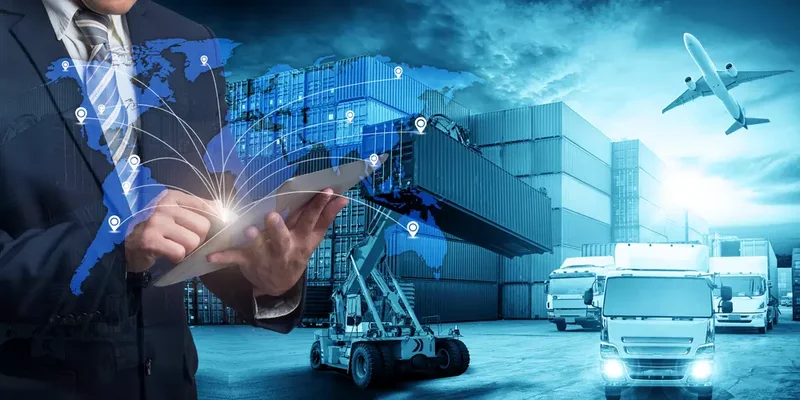

- Problem Statement:

 Delhivery is one of India's fastest-growing logistics firms, providing reliable transportation to various segments of the economy ranging from retail customers to e-commerce giants. They aim to build state-of-the-art operations and gain a competitive advantage by minimizing delivery time and achieving maximum efficiency in logistics.

Using this dataset, the firm wants to find opportunities to improve efficiency in operations and understand how the estimated delivery time/distance varies with respect to the actual delivery time/distance.


       
###  Features of the dataset:

- Column Profiling:

| Feature | Description |
|:--------|:------------|
|data| tells whether the data is testing or training data|
|trip_creation_time| Timestamp of trip creation|
|route_schedule_uuid| Unique ID for a particular route schedule|
|**route_type**| **Transportation type**|
|a. FTL–Full Truck Load| FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way|
|b. Carting | Handling system consisting of small vehicles (carts)|
|trip_uuid| Unique ID given to a particular trip (A trip may include different source and destination centers)|
|source_center| Source ID of trip origin |
|source_name| Source Name of trip origin |
|destination_center| Destination ID |
|destination_name| Destination Name |
|od_start_time| Trip start time |
|od_end_time| Trip end time |
|start_scan_to_end_scan | Time taken to deliver from source to destination |
|is_cutoff | Unknown field |
|cutoff_factor | Unknown field|
|cutoff_timestamp | Unknown field|
|actual_distance_to_destination | Distance in kms between source and destination warehouse|
|actual_time | Actual time taken to complete the delivery (Cumulative) |
|osrm_time | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
|osrm_distance | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
|factor | Unknown field |
| segment_actual_time | This is a segment time. Time taken by the subset of the package delivery|
|segment_osrm_time | This is the OSRM segment time. Time taken by the subset of the package delivery|
| segment_osrm_distance | This is the OSRM distance. Distance covered by subset of the package delivery|
| segment_factor | Unknown field |

# Data preprocessing

- Importing the necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import  SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
df=pd.read_csv('/content/delhivery.csv')
# view the first few rows to understand its structure and contents
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

- Exploration of data

In [ ]:
# view the last few rows
df.tail()

data          trip_creation_time  \
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...    Carting   

                      trip_uuid source_center                 source_name  \
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                     od_start_time  ...            cutoff_timestamp  \
144862  2018-09-20 16:24:28.436231  ...         2018-09-20 21:57:20   
144863  2018-09-20 16:24:28.436231  ...         2018-09-20 21:31:18   
144864  2018-09-20 16:24:28.436231  ...         2018-09-20 21:11:18   
144865  2018-09-20 16:24:28.436231  ...         2018-09-20 20:53:19   
144866  2018-09-20 16:24:28.436231  ...  2018-09-20 16:24:28.436231   

        actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
144862                       45.258278         94.0       60.0       67.9280   
144863                       54.092531        120.0       76.0       85.6829   
144864                       66.163591        140.0       88.0       97.0933   
144865                       73.680667        158.0       98.0      111.2709   
144866                       70.039010        426.0       95.0       88.7319   

          factor  segment_actual_time  segment_osrm_time  \
144862  1.566667                 12.0               12.0   
144863  1.578947                 26.0               21.0   
144864  1.590909                 20.0               34.0   
144865  1.612245                 17.0               27.0   
144866  4.484211                268.0                9.0   

        segment_osrm_distance  segment_factor  
144862                 8.1858        1.000000  
144863                17.3725        1.238095  
144864                20.7053        0.588235  
144865                18.8885        0.629630  
144866                 8.8088       29.777778  

[5 rows x 24 columns]

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

- Duplicate Detection

In [ ]:
df.duplicated().sum()

0

- Missing value

In [ ]:
df.isnull().sum()/df.shape[0]*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_factor                    0.000000
dtype: float64

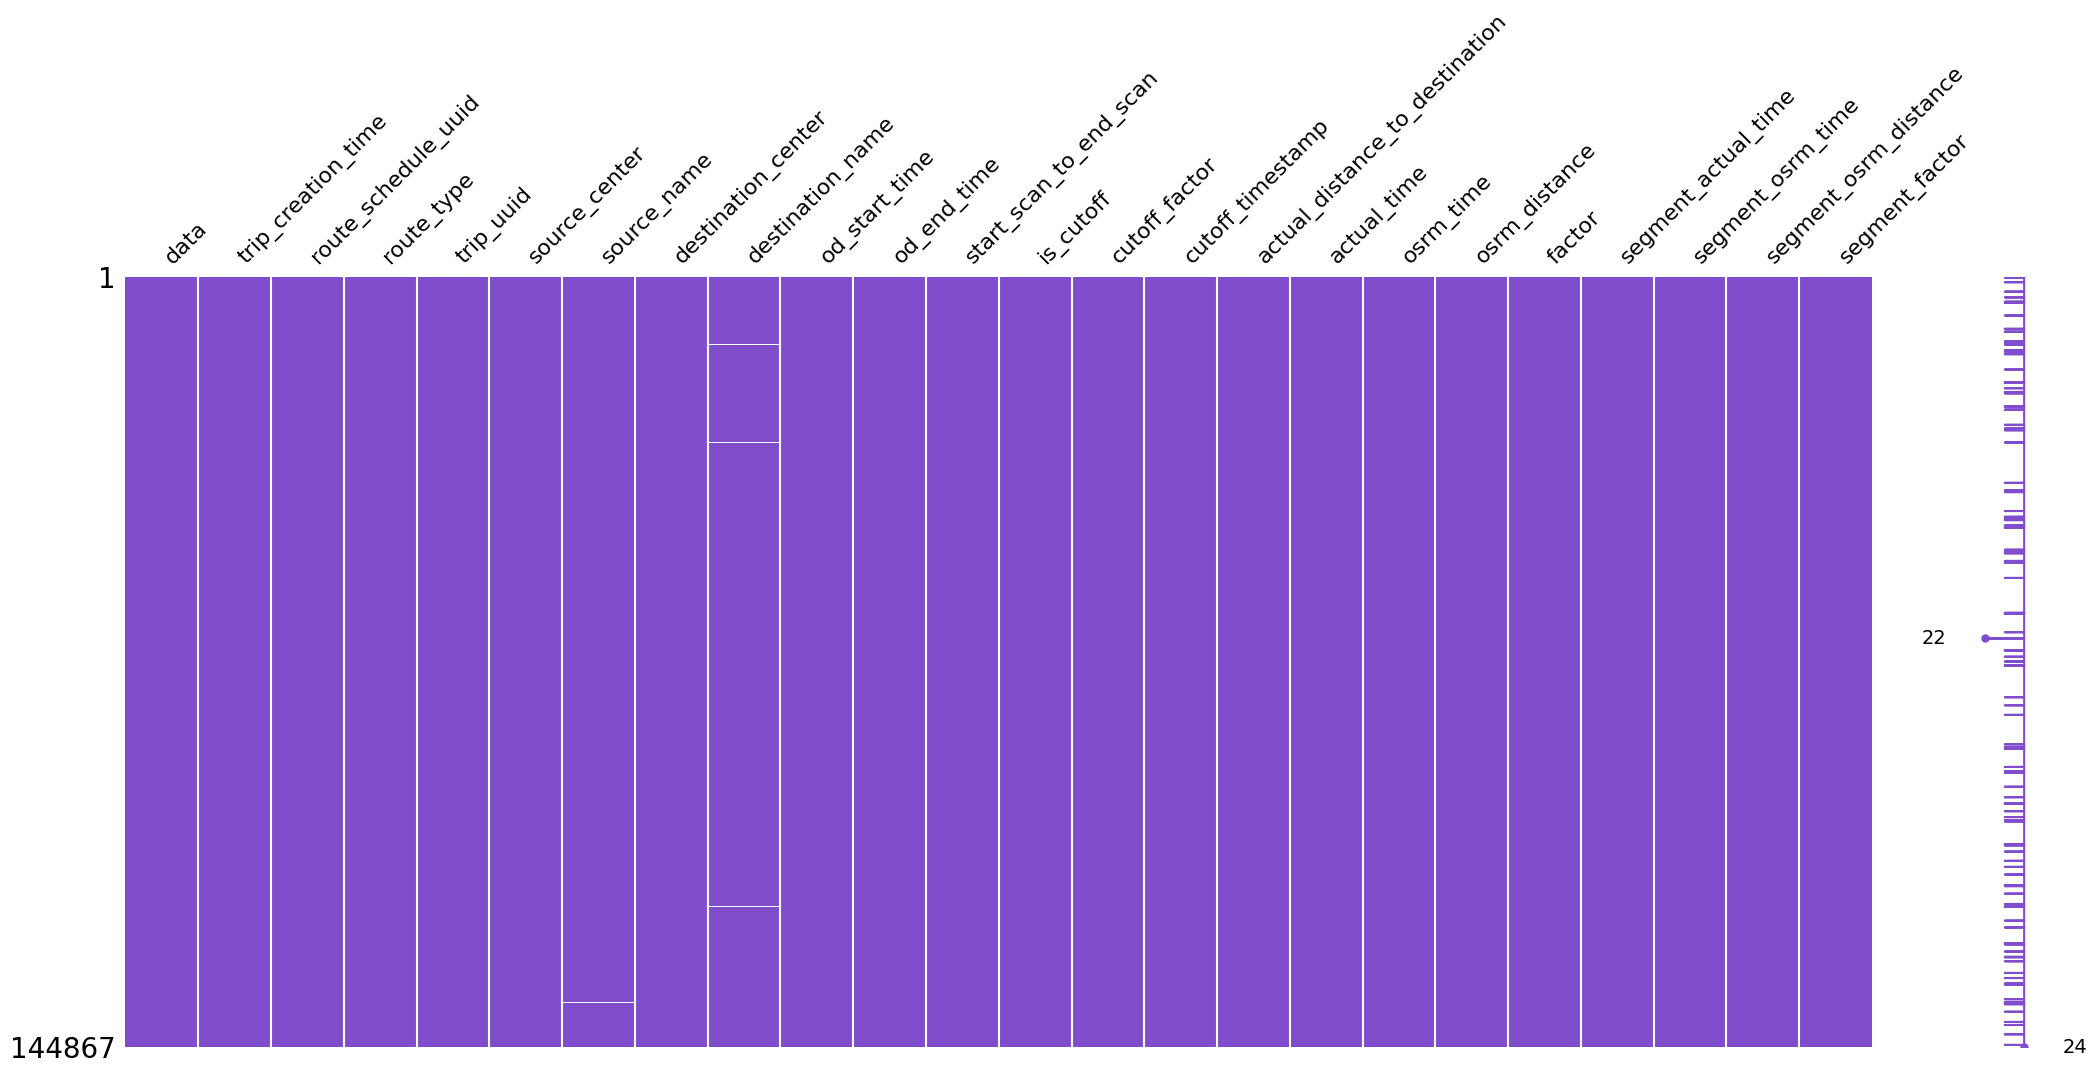

There are 293 missing values in source_name
There are 261 missing values in destination_name


In [ ]:
msno.matrix(df,color=(0.50,0.30,0.80))
plt.show()
x=df.isnull().sum()
for a,b in x.items():
    if b>0:
        print(f'There are {b} missing values in {a}')

In [ ]:
df.isna().any().T

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                        True
destination_center                False
destination_name                   True
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

- **Null Treatment:**

Handle null values in 'source_name' and 'destination_name' columns  through freq_imputer

In [ ]:
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for i in ['source_name', 'destination_name']:
    df[i] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[i])))


df.isna().any()

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                       False
destination_center                False
destination_name                  False
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

In [ ]:
# Separate column names by data type
cat=df.select_dtypes(include='object')
num=df.select_dtypes(include='number')
print('categorical_columns :\n ',cat.columns)
print('********************************************************************')
print('numerical_columns :\n ',num.columns)

categorical_columns :
  Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time', 'cutoff_timestamp'],
      dtype='object')
********************************************************************
numerical_columns :
  Index(['start_scan_to_end_scan', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor'],
      dtype='object')


**Detect any outliers in numerical data by  Z_score**

In [ ]:
from scipy.stats import zscore
z_scores = num.apply(zscore)
outliers = (z_scores.abs() > 3).sum()

outliers

start_scan_to_end_scan             350
cutoff_factor                     3428
actual_distance_to_destination    3429
actual_time                       3526
osrm_time                         3595
osrm_distance                     3611
factor                            1317
segment_actual_time               1208
segment_osrm_time                 2113
segment_osrm_distance             1509
segment_factor                     790
dtype: int64

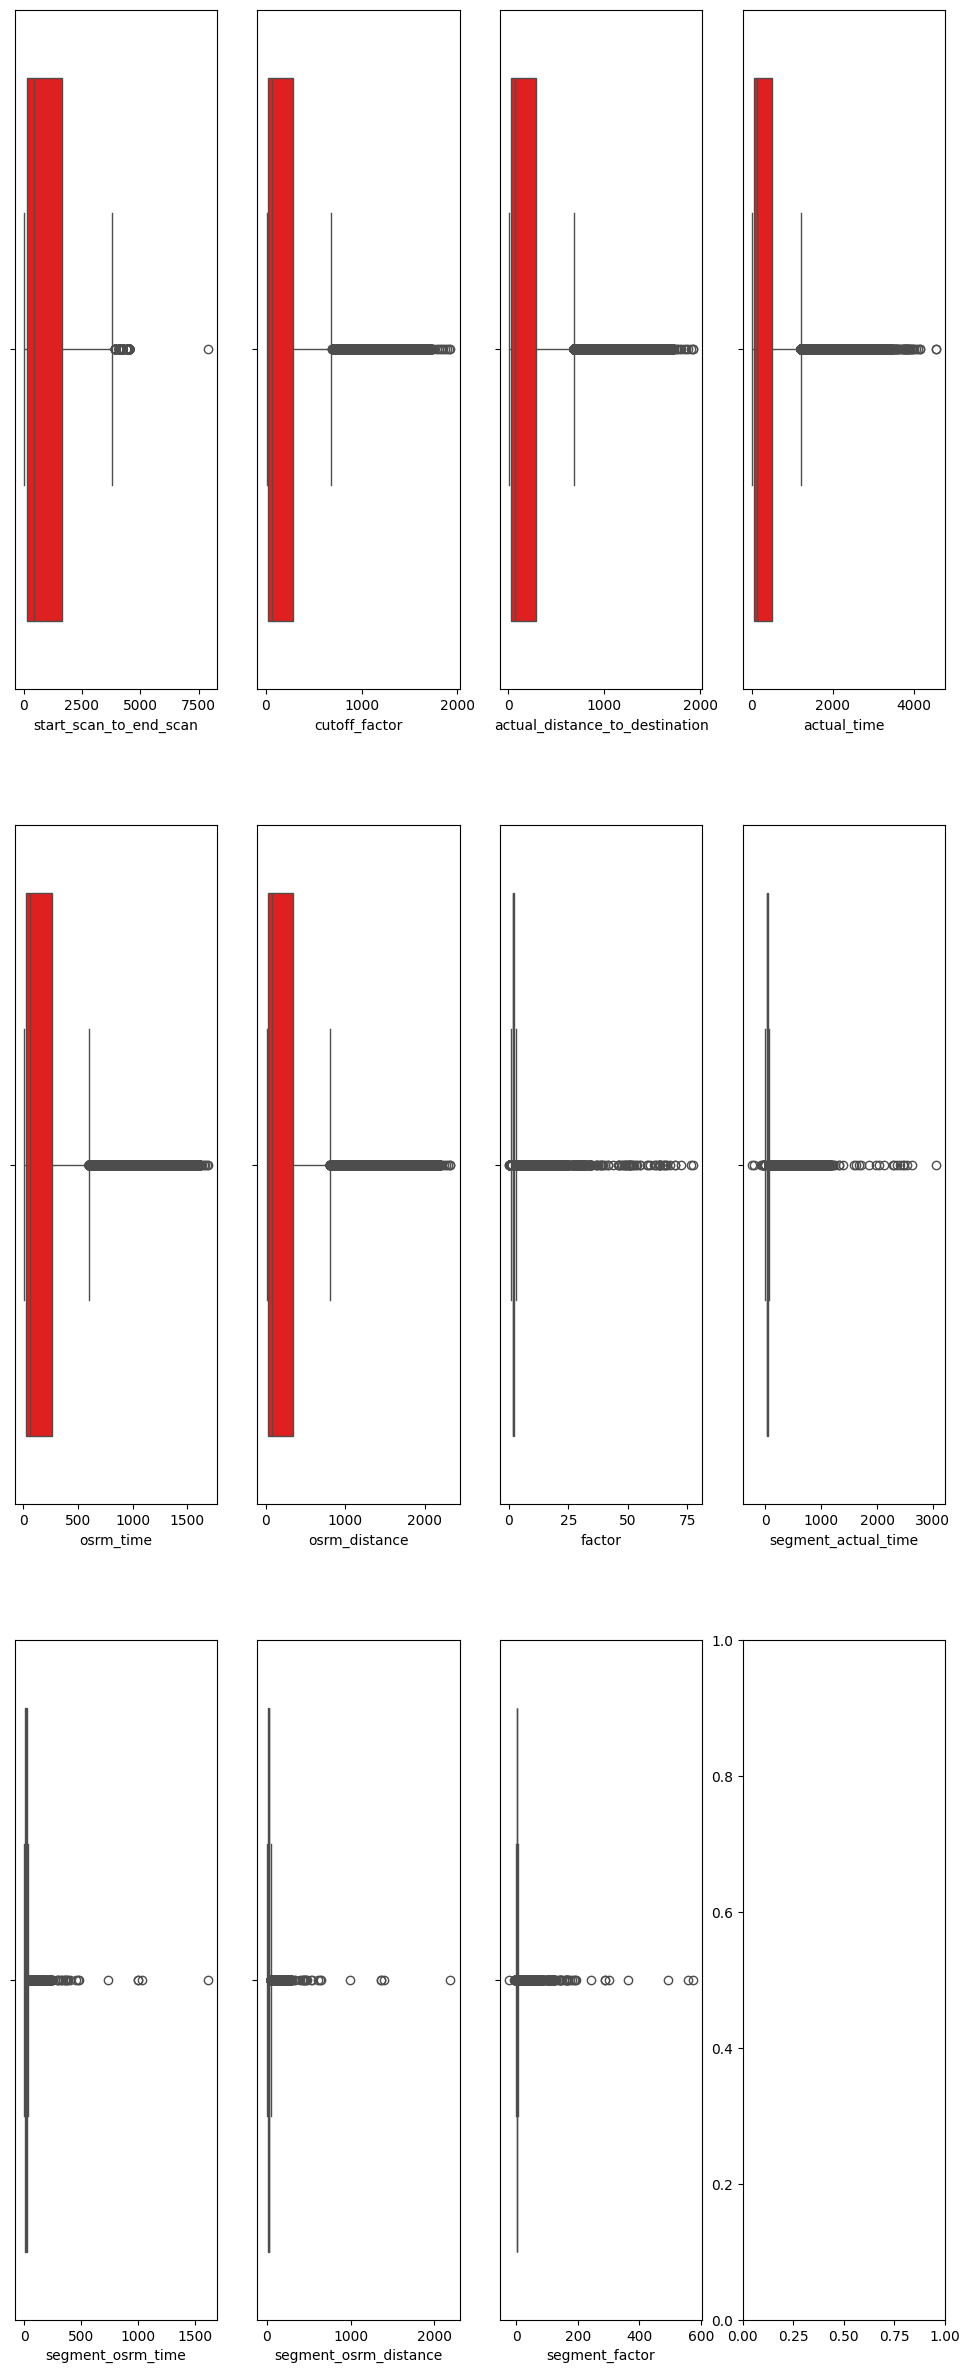

In [ ]:
# Plot outliers for each numerical column
fig, axes = plt.subplots(3, 4, figsize=(12, 30))
axes = axes.flatten()
for i, c in enumerate(num):
    sns.boxplot(x=df[c],ax=axes[i],color='red')

**Outlier Handle**

In [ ]:
for i, col in enumerate(num.columns):
    data = df[col]
    display(data.to_frame())


    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    clipped_data = np.clip(data, lower_bound, upper_bound)
    print(f'Clipped data of {col}')
    display(clipped_data.to_frame())
    print()



start_scan_to_end_scan
0                         86.0
1                         86.0
2                         86.0
3                         86.0
4                         86.0
...                        ...
144862                   427.0
144863                   427.0
144864                   427.0
144865                   427.0
144866                   427.0

[144867 rows x 1 columns]

Clipped data of start_scan_to_end_scan


start_scan_to_end_scan
0                         86.0
1                         86.0
2                         86.0
3                         86.0
4                         86.0
...                        ...
144862                   427.0
144863                   427.0
144864                   427.0
144865                   427.0
144866                   427.0

[144867 rows x 1 columns]

cutoff_factor
0                   9
1                  18
2                  27
3                  36
4                  39
...               ...
144862             45
144863             54
144864             63
144865             72
144866             70

[144867 rows x 1 columns]

Clipped data of cutoff_factor


cutoff_factor
0                   9
1                  18
2                  27
3                  36
4                  39
...               ...
144862             45
144863             54
144864             63
144865             72
144866             70

[144867 rows x 1 columns]

actual_distance_to_destination
0                            10.435660
1                            18.936842
2                            27.637279
3                            36.118028
4                            39.386040
...                                ...
144862                       45.258278
144863                       54.092531
144864                       66.163591
144865                       73.680667
144866                       70.039010

[144867 rows x 1 columns]

Clipped data of actual_distance_to_destination


actual_distance_to_destination
0                            10.435660
1                            18.936842
2                            27.637279
3                            36.118028
4                            39.386040
...                                ...
144862                       45.258278
144863                       54.092531
144864                       66.163591
144865                       73.680667
144866                       70.039010

[144867 rows x 1 columns]

actual_time
0              14.0
1              24.0
2              40.0
3              62.0
4              68.0
...             ...
144862         94.0
144863        120.0
144864        140.0
144865        158.0
144866        426.0

[144867 rows x 1 columns]

Clipped data of actual_time


actual_time
0              14.0
1              24.0
2              40.0
3              62.0
4              68.0
...             ...
144862         94.0
144863        120.0
144864        140.0
144865        158.0
144866        426.0

[144867 rows x 1 columns]

osrm_time
0            11.0
1            20.0
2            28.0
3            40.0
4            44.0
...           ...
144862       60.0
144863       76.0
144864       88.0
144865       98.0
144866       95.0

[144867 rows x 1 columns]

Clipped data of osrm_time


osrm_time
0            11.0
1            20.0
2            28.0
3            40.0
4            44.0
...           ...
144862       60.0
144863       76.0
144864       88.0
144865       98.0
144866       95.0

[144867 rows x 1 columns]

osrm_distance
0             11.9653
1             21.7243
2             32.5395
3             45.5620
4             54.2181
...               ...
144862        67.9280
144863        85.6829
144864        97.0933
144865       111.2709
144866        88.7319

[144867 rows x 1 columns]

Clipped data of osrm_distance


osrm_distance
0             11.9653
1             21.7243
2             32.5395
3             45.5620
4             54.2181
...               ...
144862        67.9280
144863        85.6829
144864        97.0933
144865       111.2709
144866        88.7319

[144867 rows x 1 columns]

factor
0       1.272727
1       1.200000
2       1.428571
3       1.550000
4       1.545455
...          ...
144862  1.566667
144863  1.578947
144864  1.590909
144865  1.612245
144866  4.484211

[144867 rows x 1 columns]

Clipped data of factor


factor
0       1.272727
1       1.200000
2       1.428571
3       1.550000
4       1.545455
...          ...
144862  1.566667
144863  1.578947
144864  1.590909
144865  1.612245
144866  3.127312

[144867 rows x 1 columns]

segment_actual_time
0                      14.0
1                      10.0
2                      16.0
3                      21.0
4                       6.0
...                     ...
144862                 12.0
144863                 26.0
144864                 20.0
144865                 17.0
144866                268.0

[144867 rows x 1 columns]

Clipped data of segment_actual_time


segment_actual_time
0                      14.0
1                      10.0
2                      16.0
3                      21.0
4                       6.0
...                     ...
144862                 12.0
144863                 26.0
144864                 20.0
144865                 17.0
144866                 70.0

[144867 rows x 1 columns]

segment_osrm_time
0                    11.0
1                     9.0
2                     7.0
3                    12.0
4                     5.0
...                   ...
144862               12.0
144863               21.0
144864               34.0
144865               27.0
144866                9.0

[144867 rows x 1 columns]

Clipped data of segment_osrm_time


segment_osrm_time
0                    11.0
1                     9.0
2                     7.0
3                    12.0
4                     5.0
...                   ...
144862               12.0
144863               21.0
144864               34.0
144865               27.0
144866                9.0

[144867 rows x 1 columns]

segment_osrm_distance
0                     11.9653
1                      9.7590
2                     10.8152
3                     13.0224
4                      3.9153
...                       ...
144862                 8.1858
144863                17.3725
144864                20.7053
144865                18.8885
144866                 8.8088

[144867 rows x 1 columns]

Clipped data of segment_osrm_distance


segment_osrm_distance
0                     11.9653
1                      9.7590
2                     10.8152
3                     13.0224
4                      3.9153
...                       ...
144862                 8.1858
144863                17.3725
144864                20.7053
144865                18.8885
144866                 8.8088

[144867 rows x 1 columns]

segment_factor
0             1.272727
1             1.111111
2             2.285714
3             1.750000
4             1.200000
...                ...
144862        1.000000
144863        1.238095
144864        0.588235
144865        0.629630
144866       29.777778

[144867 rows x 1 columns]

Clipped data of segment_factor


segment_factor
0             1.272727
1             1.111111
2             2.285714
3             1.750000
4             1.200000
...                ...
144862        1.000000
144863        1.238095
144864        0.588235
144865        0.629630
144866        3.603261

[144867 rows x 1 columns]

 - Sanitize and Normalize Data

In [ ]:
# Standardizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print("Standardized Column Names:\n", df.columns)

Standardized Column Names:
 Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')


## Exploratory Data Analysis (EDA)




**summary statistics**

In [ ]:
df.describe(include='number').T

count        mean          std         min  \
start_scan_to_end_scan          144867.0  961.262986  1037.012769   20.000000   
cutoff_factor                   144867.0  232.926567   344.755577    9.000000   
actual_distance_to_destination  144867.0  234.073372   344.990009    9.000045   
actual_time                     144867.0  416.927527   598.103621    9.000000   
osrm_time                       144867.0  213.868272   308.011085    6.000000   
osrm_distance                   144867.0  284.771297   421.119294    9.008200   
factor                          144867.0    2.120107     1.715421    0.144000   
segment_actual_time             144867.0   36.196111    53.571158 -244.000000   
segment_osrm_time               144867.0   18.507548    14.775960    0.000000   
segment_osrm_distance           144867.0   22.829020    17.860660    0.000000   
segment_factor                  144867.0    2.218368     4.847530  -23.444444   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  449.000000  1634.000000   
cutoff_factor                    22.000000   66.000000   286.000000   
actual_distance_to_destination   23.355874   66.126571   286.708875   
actual_time                      51.000000  132.000000   513.000000   
osrm_time                        27.000000   64.000000   257.000000   
osrm_distance                    29.914700   78.525800   343.193250   
factor                            1.604264    1.857143     2.213483   
segment_actual_time              20.000000   29.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.070100   23.513000    27.813250   
segment_factor                    1.347826    1.684211     2.250000   

                                        max  
start_scan_to_end_scan          7898.000000  
cutoff_factor                   1927.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
factor                            77.387097  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700  
segment_factor                   574.250000

**Check for outliers in numerical features using box plots**

### Univariate Data Analysis

> - For each categorical feature, analyze the frequency distribution using bar plots or pie charts.

>    - For each numerical feature analyze its distribution using histograms, kernel density plots, and summary statistics.
   





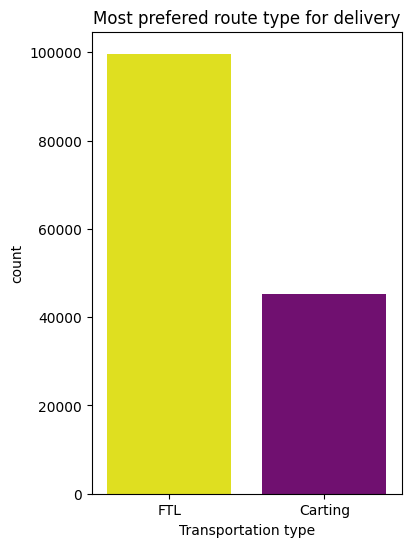

In [ ]:
plt.figure(figsize=(4,6))
plt.ticklabel_format(style='plain')
color_sequences = ['yellow', 'purple']

sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts().values,palette=color_sequences)
plt.title('Most prefered route type for delivery')
plt.xlabel('Transportation type')
plt.ylabel('count')

plt.show()

Most of them using carting (Handling system consisting of small vehicles (carts)) rout type

**Time taken to deliver from source to destination**

Text(0.5, 1.0, 'Time taken to deliver from source to destination')

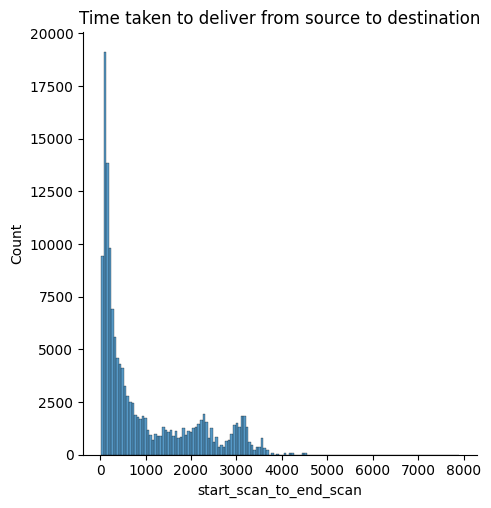

In [ ]:
sns.displot(df['start_scan_to_end_scan'])
plt.title('Time taken to deliver from source to destination')

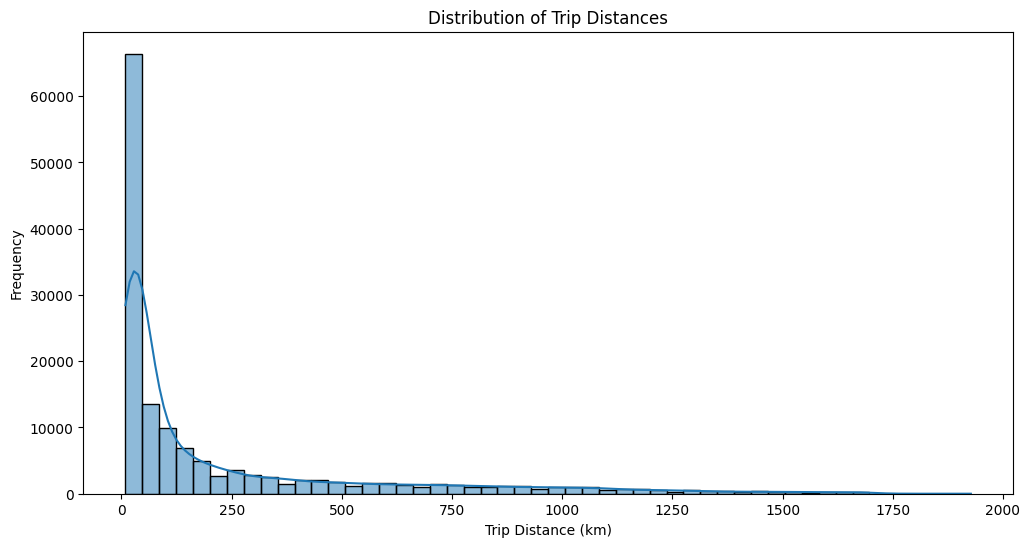

In [ ]:
# Plot the distribution of trip distances
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_distance_to_destination'], bins=50, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

[]

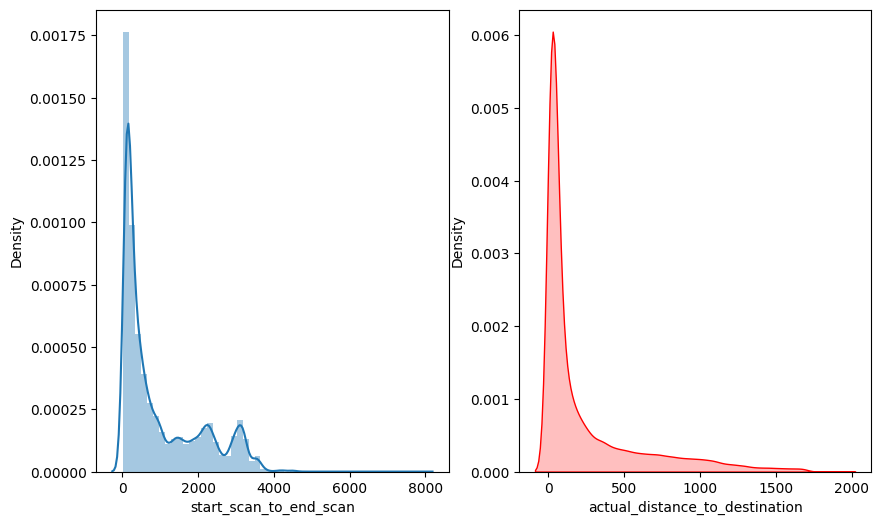

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(121)  #  1st subplot
sns.distplot(df['start_scan_to_end_scan'])
plt.plot()

plt.subplot(122)
sns.kdeplot(df['actual_distance_to_destination'],color='Red',shade=True)
plt.plot()

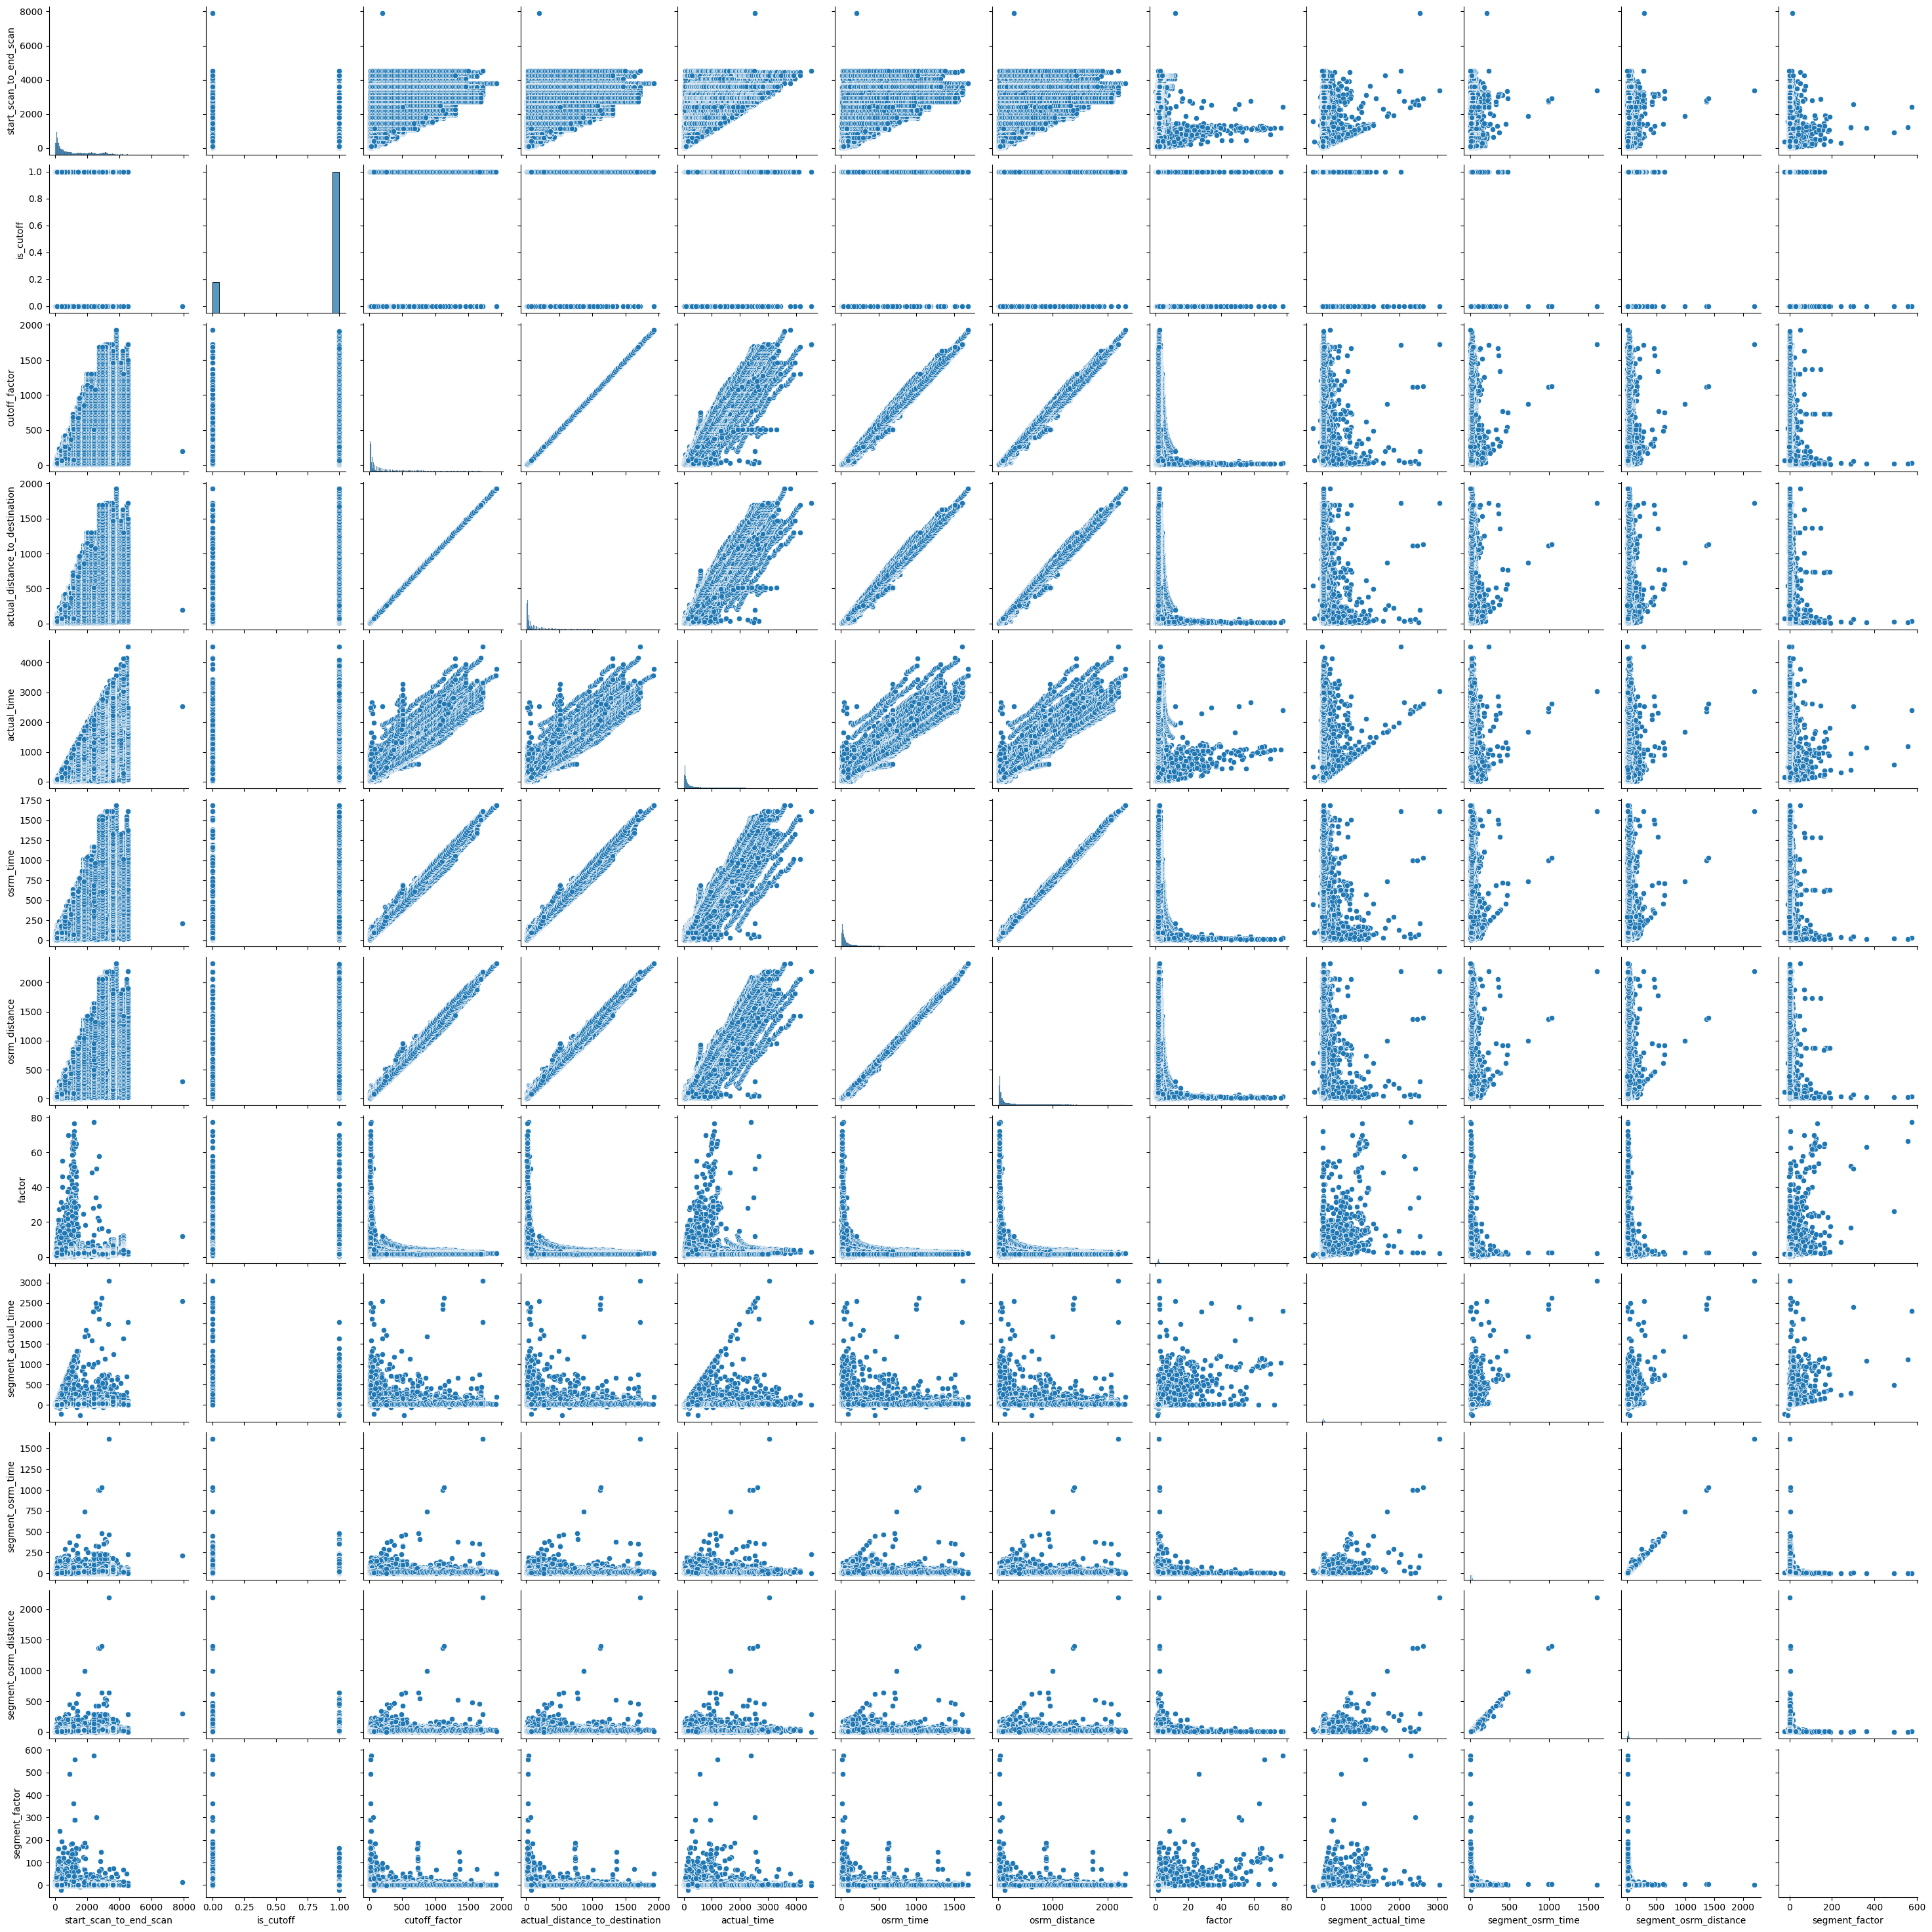

In [ ]:
sns.pairplot(df)

### Bivariate Data Analysis:

**Relationship between trip duration and distance**

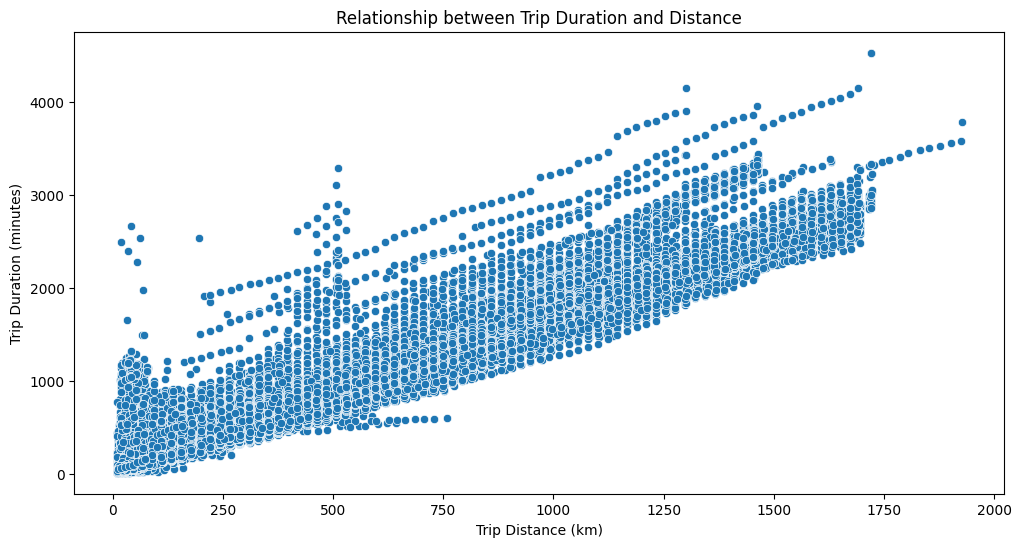

In [ ]:
# Plot the relationship between trip duration and distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_distance_to_destination', y='actual_time', data=df)
plt.title('Relationship between Trip Duration and Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (minutes)')
plt.show()

**Comparison of OSRM Time vs Actual Time**

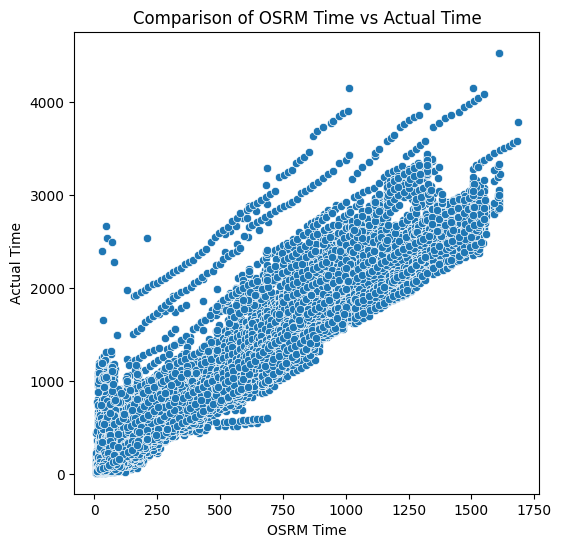

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='osrm_time', y='actual_time')
plt.title('Comparison of OSRM Time vs Actual Time')
plt.xlabel('OSRM Time')
plt.ylabel('Actual Time')
plt.show()

**comparison between actual distance and OSRM estimated distance**

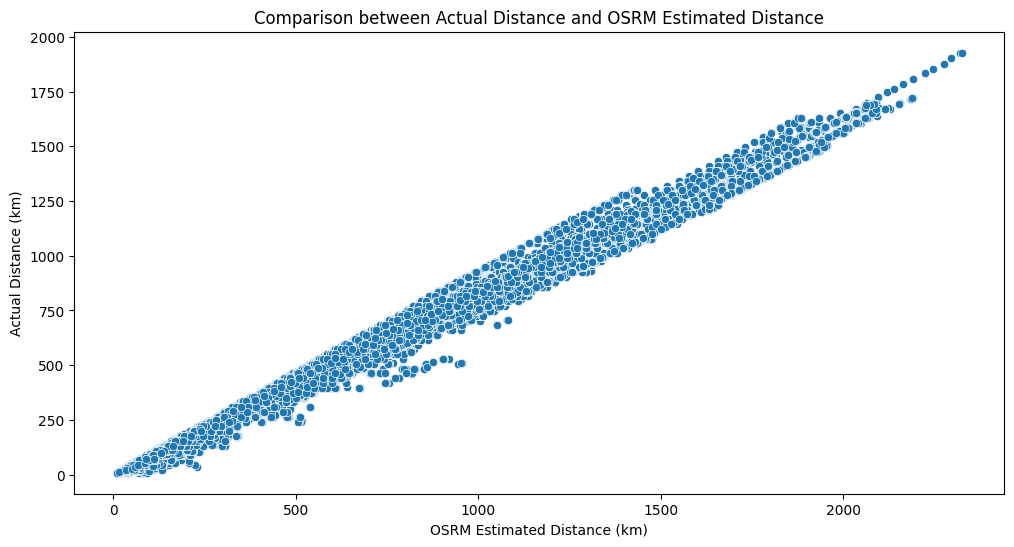

In [ ]:
# Plot the comparison between actual distance and OSRM estimated distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='osrm_distance', y='actual_distance_to_destination', data=df)
plt.title('Comparison between Actual Distance and OSRM Estimated Distance')
plt.xlabel('OSRM Estimated Distance (km)')
plt.ylabel('Actual Distance (km)')
plt.show()

There appears to be a positive correlation between OSRM & Actual Time.

 ### Multivariate Data Analysis


   
   - Perform dimensionality reduction techniques such as PCA (Principal Component Analysis) to identify important combinations of features.
   - Explore interactions between multiple features using 3D plots or parallel coordinates plots.
   - Utilize techniques like heatmap or correlation matrix to visualize the correlation structure among all numerical features.

**Create heatmap**

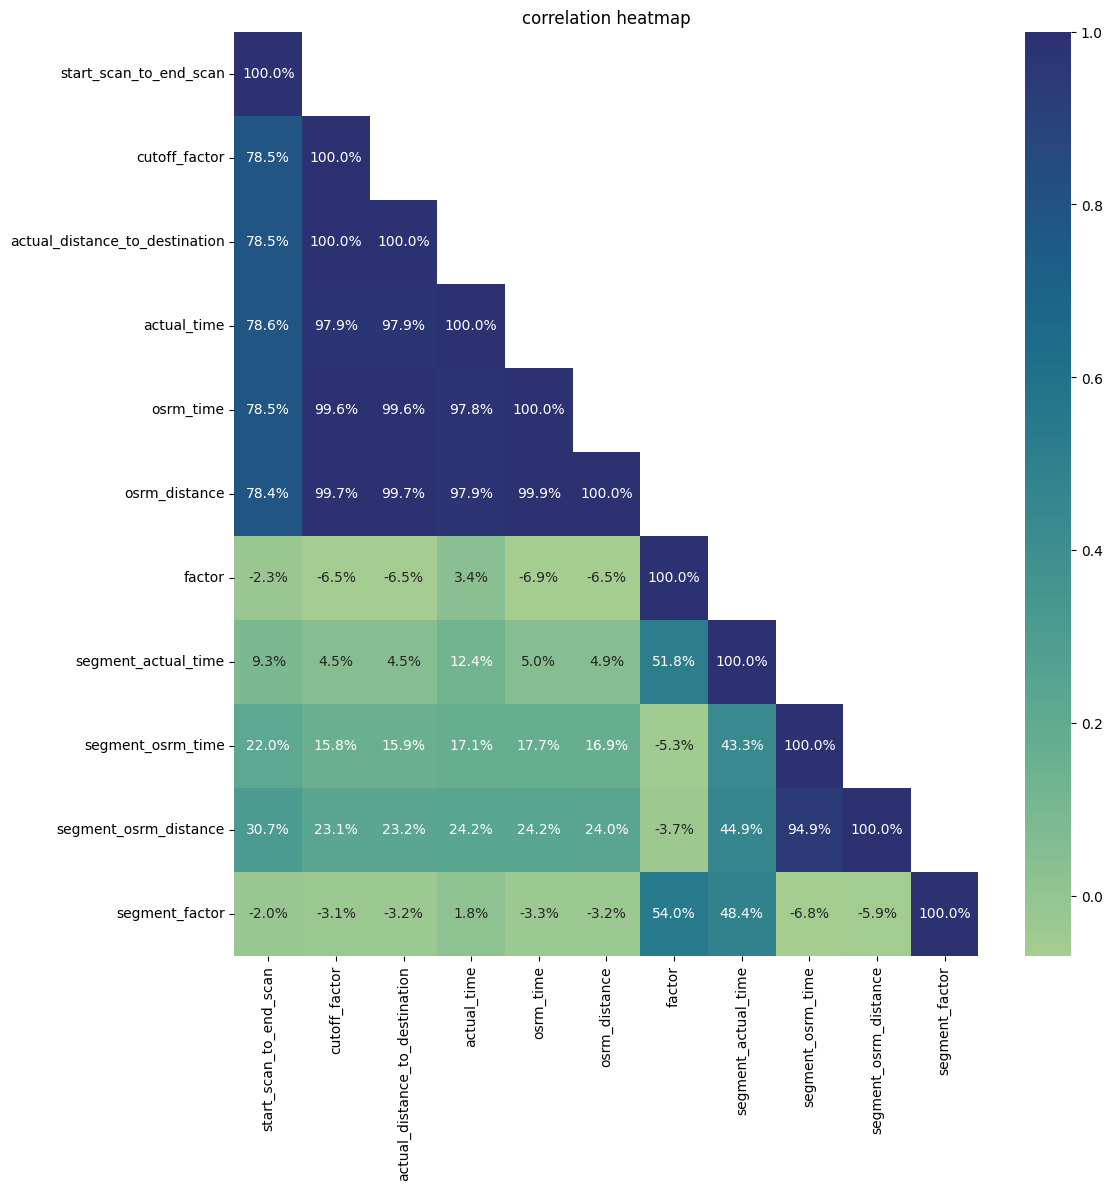

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
corr = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='crest', mask=np.triu(corr, +1), fmt="0.0001%")
plt.title('correlation heatmap')
plt.show()

- A statistically significant positive correlation exists between the distance to the destination and the actual delivery time.

- A robust correlation of 0.98 is evident between 'osrm_distance' and 'osrm_time,' indicating a strong positive relationship. Similarly, a comparable relationship is observed between 'Segment_osrm_time' and 'segment_osrm_distance.' The high correlation values signify that changes in distance are highly predictive of corresponding changes in time for both overall and segmented data.

# Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to the predictive models, resulting in improved model accuracy and performance. It is a critical step in the data science workflow that can greatly impact the outcome of a machine learning project.

- **Understand the Domain and Problem Statement**

Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.

It offers a practical framework for understanding and processing data, which is essential for their operations. By utilizing data engineering pipelines and data analysis techniques, Delhivery can accomplish several important goals.

- - **Objective**

 Logistics dataset focused on delivery time prediction with both actual and OSRM .




> Examine the Data



In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    float64
dtype: object

In [ ]:
# Converting the datatypes to category for columns
df['data']=df['data'].astype('category')
df['route_type']=df['route_type'].astype('category')

# Converting time columns to datetime format
for col in ['trip_creation_time', 'od_start_time', 'od_end_time']:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

 - **Feature Selection**
   - Task: Identify the most relevant features for the analysis or modeling task.

In [ ]:
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ...            cutoff_timestamp  \
0 2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1 2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2 2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3 2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4 2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]



> Handle Multicollinearity





>>  Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated, indicating a strong linear relationship among the predictor variables. This issue complicates regression analysis by making it difficult to accurately determine the individual effects of each independent variable on the dependent variable.







In [ ]:
# Detecting Multicollinearity Using a Variance Inflation Factor (VIF)
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif
numerical_features = df.select_dtypes(include=[np.number])

# Calculate VIF
vif_df = calculate_vif(numerical_features)
vif_df

feature           VIF
0           start_scan_to_end_scan      5.281888
1                    cutoff_factor  54109.652471
2   actual_distance_to_destination  54591.194134
3                      actual_time     50.222183
4                        osrm_time   1028.005381
5                    osrm_distance   1376.850323
6                           factor      2.992717
7              segment_actual_time      3.186038
8                segment_osrm_time     33.215836
9            segment_osrm_distance     35.774723
10                  segment_factor      2.004220



*   VIF starts at 1 and has no upper limit

*   VIF = 1, no correlation between the independent variable and the other variables

**Features with very high VIF values, indicating significant multicollinearity**

- cutoff_factor: 54109.652471

- actual_distance_to_destination: 54591.194134

- osrm_time: 1028.005381

- osrm_distance: 1376.850323


In [ ]:
# Remove features with the highest VIF
features_to_remove = ['cutoff_factor']

# Drop these features
data_remove = numerical_features.drop(columns=features_to_remove)

# Recalculate VIF
vif_remove_df = calculate_vif(data_remove)
vif_remove_df

feature          VIF
0          start_scan_to_end_scan     5.248155
1  actual_distance_to_destination   269.040810
2                     actual_time    49.535439
3                       osrm_time  1026.341307
4                   osrm_distance  1376.614417
5                          factor     2.950122
6             segment_actual_time     3.178702
7               segment_osrm_time    33.175720
8           segment_osrm_distance    35.348255
9                  segment_factor     2.004189

After removing cutoff_factor  the VIF values for actual_distance_to_destination is reduced.



>  Feature Importance Technique





- mutual information



The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

In [ ]:
lable = df['actual_time']
features = df.drop(columns=['actual_time'])
LE = LabelEncoder()

for col in features.columns:
    if features[col].dtype == 'object':
        features[col] = pd.to_numeric(features[col], errors='coerce')
        LE.fit(features[col].unique())
        features[col] = LE.transform(features[col])


In [ ]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LE.fit_transform(df[col])

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Convert datetime columns to numerical representation
for col in features.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns:
    features[col] = features[col].view('int64') // 10**9


for col in features.select_dtypes(include=['object', 'category']).columns:
    features[col] = pd.to_numeric(features[col], errors='coerce')
    features[col] = features[col].fillna(features[col].mean())


    LE = LabelEncoder()
    features[col] = features[col].astype(str)
    features[col] = LE.fit_transform(features[col])


# calculate MI scores
mi_scores = mutual_info_regression(features, lable)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=features.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)

factor                            2.231031
osrm_distance                     1.655991
osrm_time                         1.567046
cutoff_factor                     1.562282
actual_distance_to_destination    1.556347
segment_actual_time               0.797218
start_scan_to_end_scan            0.698925
segment_factor                    0.478875
segment_osrm_distance             0.238555
segment_osrm_time                 0.177407
od_end_time                       0.075374
is_cutoff                         0.039837
trip_creation_time                0.036676
od_start_time                     0.022079
route_type                        0.004142
data                              0.001257
trip_uuid                         0.001001
cutoff_timestamp                  0.000750
destination_name                  0.000000
destination_center                0.000000
source_name                       0.000000
source_center                     0.000000
route_schedule_uuid               0.000000
Name: MI Sc

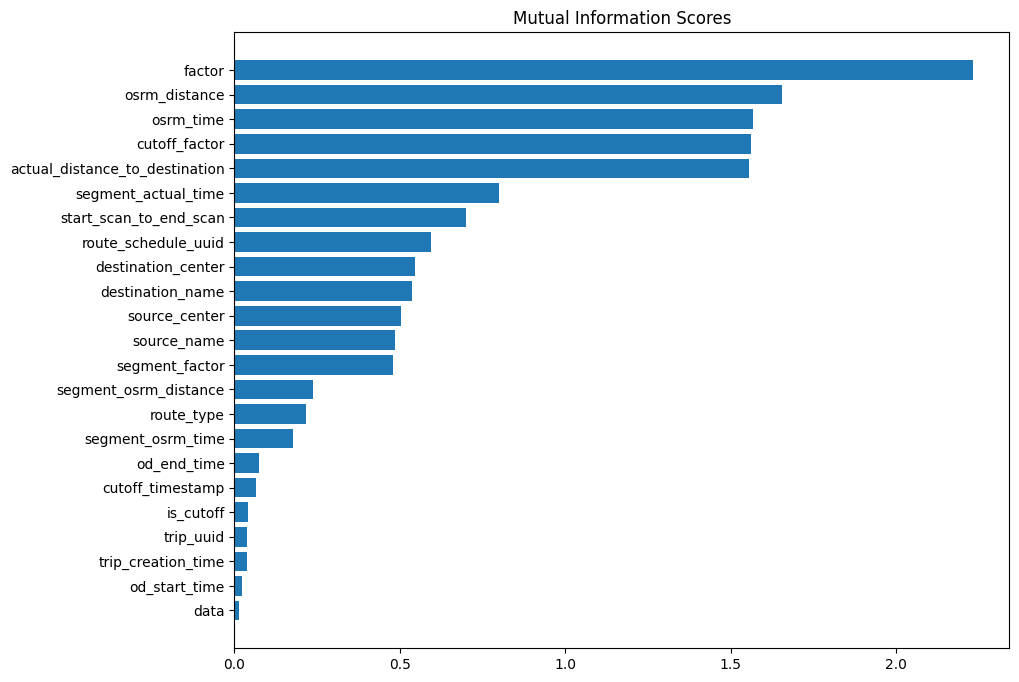

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(figsize=(10, 8))
plot_mi_scores(mi_scores)

The high-scoring Factor feature exhibits a strong relationship with the target.

- Random Forest feature importance

In [ ]:
RF=RandomForestRegressor()
RF.fit(features, lable)

rf_importances = pd.Series(RF.feature_importances_, index=features.columns)
rf_importances = rf_importances.sort_values(ascending=False)
# Print rf_importances
print(rf_importances)

osrm_distance                     0.871019
actual_distance_to_destination    0.083383
factor                            0.034021
osrm_time                         0.005175
cutoff_factor                     0.004664
start_scan_to_end_scan            0.001079
segment_actual_time               0.000488
od_start_time                     0.000039
trip_creation_time                0.000034
segment_factor                    0.000029
segment_osrm_distance             0.000024
od_end_time                       0.000023
segment_osrm_time                 0.000017
is_cutoff                         0.000005
destination_name                  0.000000
destination_center                0.000000
cutoff_timestamp                  0.000000
source_name                       0.000000
source_center                     0.000000
trip_uuid                         0.000000
route_type                        0.000000
route_schedule_uuid               0.000000
data                              0.000000
dtype: floa



> Remove Irrelevant Features



In [ ]:
# Dropping
df=df.drop(['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'],axis=1)

**Create New Features**



> Mathematical Transformations



In [ ]:
# calculating
df['od_duration_dirr_hour']=(df['od_end_time']-df['od_start_time']).dt.total_seconds()/3600

In [ ]:
# Create ratio features
df['osrm_distance_time_ratio']=df['osrm_distance']/df['osrm_time']
df['distance_time_ratio']=df['actual_distance_to_destination']-df['actual_time']


In [ ]:
# Time period of data
print(f"Max od_start_time: {df['od_start_time'].max()}\nMin od_start_time: {df['od_start_time'].min()}")
print(f"Range of od_start_time: {df['od_start_time'].max()-df['od_start_time'].min()}")

Max od_start_time: 2018-10-06 04:27:23.392375
Min od_start_time: 2018-09-12 00:00:16.535741
Range of od_start_time: 24 days 04:27:06.856634


In [ ]:
# Time period of data
print(f"Max od_end_time: {df['od_end_time'].max()}\nMin od_end_time: {df['od_end_time'].min()}")
print(f"Range of od_end_time: {df['od_end_time'].max()-df['od_end_time'].min()}")

Max od_end_time: 2018-10-08 03:00:24.353479
Min od_end_time: 2018-09-12 00:50:10.814399
Range of od_end_time: 26 days 02:10:13.539080




> Aggregations



In [ ]:
# Merge trip_uuid and route_schedule_uuid
df['trip_route_id'] = df['trip_uuid'].astype(str)  + '_' + df['route_schedule_uuid'].astype(str)

In [ ]:
# Aggregate by segment
segment_columns = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df['segment_key'] = df['trip_uuid'].astype(str)  + '+' + df['source_center'].astype(str)  + '+' + df['destination_center'].astype(str)

for col in segment_columns:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

segment_key  \
0       trip-153741093647649320+IND388121AAA+IND388620AAB   
1       trip-153741093647649320+IND388121AAA+IND388620AAB   
2       trip-153741093647649320+IND388121AAA+IND388620AAB   
3       trip-153741093647649320+IND388121AAA+IND388620AAB   
4       trip-153741093647649320+IND388121AAA+IND388620AAB   
...                                                   ...   
144862  trip-153746066843555182+IND131028AAB+IND000000ACB   
144863  trip-153746066843555182+IND131028AAB+IND000000ACB   
144864  trip-153746066843555182+IND131028AAB+IND000000ACB   
144865  trip-153746066843555182+IND131028AAB+IND000000ACB   
144866  trip-153746066843555182+IND131028AAB+IND000000ACB   

        segment_actual_time  segment_actual_time_sum  segment_osrm_distance  \
0                      14.0                     14.0                11.9653   
1                      10.0                     24.0                 9.7590   
2                      16.0                     40.0                10.8152   
3                      21.0                     61.0                13.0224   
4                       6.0                     67.0                 3.9153   
...                     ...                      ...                    ...   
144862                 12.0                     92.0                 8.1858   
144863                 26.0                    118.0                17.3725   
144864                 20.0                    138.0                20.7053   
144865                 17.0                    155.0                18.8885   
144866                268.0                    423.0                 8.8088   

        segment_osrm_distance_sum  segment_osrm_time  segment_osrm_time_sum  
0                         11.9653               11.0                   11.0  
1                         21.7243                9.0                   20.0  
2                         32.5395                7.0                   27.0  
3                         45.5619               12.0                   39.0  
4                         49.4772                5.0                   44.0  
...                           ...                ...                    ...  
144862                    65.3487               12.0                   94.0  
144863                    82.7212               21.0                  115.0  
144864                   103.4265               34.0                  149.0  
144865                   122.3150               27.0                  176.0  
144866                   131.1238                9.0                  185.0  

[144867 rows x 7 columns]



> Date and Time Features



In [ ]:
# Extracted hour, day name, and month name from 'trip_creation_time'
df['hour_of_ day']=df['trip_creation_time'].dt.hour
df['day_of_week']=df['trip_creation_time'].dt.day_name()
df['month_of_year']=df['trip_creation_time'].dt.month_name()

In [ ]:
# Extract date and time-based features
if 'cutoff_timestamp' in df.columns:
    df['cutoff_hour'] = df['cutoff_timestamp'].dt.hour
    df['cutoff_day'] = df['cutoff_timestamp'].dt.day
    df['cutoff_month'] = df['cutoff_timestamp'].dt.month
    df['cutoff_year'] = df['cutoff_timestamp'].dt.year

In [ ]:
# Extract city ,code and state from destination_name
df['destination_name'] = df['destination_name'].astype(str)
# Split only if '(' is present, otherwise assign NaN to the new columns
df[['destination','destination_state']] = df['destination_name'].str.split('(', n=1, expand=True).reindex(columns=[0, 1])
df['destination_state'] = df['destination_state'].astype(str).str.rstrip(')')
df[['destination_City','destination_place','destination_code']] = df['destination'].str.split('_', n=2, expand=True).reindex(columns=[0, 1, 2])


# Extract city ,code and state from source_name
df['source_name'] = df['source_name'].astype(str)

df[['source','source_state']] = df['source_name'].str.split('(', n=1, expand=True).reindex(columns=[0, 1])
df['source_state'] = df['source_state'].astype(str).str.rstrip(')')
df[['source_City','source_place','source_code']] = df['source'].str.split('_', n=2, expand=True).reindex(columns=[0, 1, 2])

# Verify the updated DataFrame
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ...           destination  destination_state  \
0 2018-09-20 03:21:32.418600  ...  Khambhat_MotvdDPP_D             Gujarat   
1 2018-09-20 03:21:32.418600  ...  Khambhat_MotvdDPP_D             Gujarat   
2 2018-09-20 03:21:32.418600  ...  Khambhat_MotvdDPP_D             Gujarat   
3 2018-09-20 03:21:32.418600  ...  Khambhat_MotvdDPP_D             Gujarat   
4 2018-09-20 03:21:32.418600  ...  Khambhat_MotvdDPP_D             Gujarat   

   destination_City  destination_place  destination_code             source  \
0          Khambhat           MotvdDPP                D   Anand_VUNagar_DC    
1          Khambhat           MotvdDPP                D   Anand_VUNagar_DC    
2          Khambhat           MotvdDPP                D   Anand_VUNagar_DC    
3          Khambhat           MotvdDPP                D   Anand_VUNagar_DC    
4          Khambhat           MotvdDPP                D   Anand_VUNagar_DC    

   source_state  source_City  source_place  source_code  
0       Gujarat        Anand       VUNagar          DC   
1       Gujarat        Anand       VUNagar          DC   
2       Gujarat        Anand       VUNagar          DC   
3       Gujarat        Anand       VUNagar          DC   
4       Gujarat        Anand       VUNagar          DC   

[5 rows x 40 columns]

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_duration_dirr_hour',
       'osrm_distance_time_ratio', 'distance_time_ratio', 'trip_route_id',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'hour_of_ day', 'day_of_week', 'month_of_year',
       'destination', 'destination_state', 'destination_City',
       'destination_place', 'destination_code', 'source', 'source_state',
       'source_City', 'source_place', 'source_code'],
      dtype='object')



> Text Features



 - TF-IDF

 It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

text_data = df['destination_name'].dropna().values

# Now you can use text_data
tfidf_features = tfidf_vectorizer.fit_transform(text_data)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

- **Feature Transformation**



> Normalization



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data (example for numerical features)
min_max_scaled_numerical = min_max_scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=df.select_dtypes(include=[np.number]).columns)
min_max_scaled_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                     0.008378                        0.000748     0.001105   
1                     0.008378                        0.005180     0.003316   
2                     0.008378                        0.009715     0.006854   
3                     0.008378                        0.014135     0.011718   
4                     0.008378                        0.015839     0.013044   
...                        ...                             ...          ...   
144862                0.051663                        0.018900     0.018793   
144863                0.051663                        0.023505     0.024541   
144864                0.051663                        0.029797     0.028963   
144865                0.051663                        0.033715     0.032943   
144866                0.051663                        0.031817     0.092195   

        osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0        0.002976       0.001276             0.078300           0.006828   
1        0.008333       0.005488             0.077086           0.005587   
2        0.013095       0.010155             0.078907           0.004345   
3        0.020238       0.015775             0.080425           0.007449   
4        0.022619       0.019511             0.075873           0.003104   
...           ...            ...                  ...                ...   
144862   0.032143       0.025427             0.077693           0.007449   
144863   0.041667       0.033090             0.081942           0.013035   
144864   0.048810       0.038014             0.080121           0.021105   
144865   0.054762       0.044132             0.079211           0.016760   
144866   0.052976       0.034405             0.155387           0.005587   

        segment_osrm_distance  od_duration_dirr_hour  \
0                    0.005460               0.008316   
1                    0.004453               0.008316   
2                    0.004935               0.008316   
3                    0.005942               0.008316   
4                    0.001787               0.008316   
...                       ...                    ...   
144862               0.003735               0.051662   
144863               0.007928               0.051662   
144864               0.009448               0.051662   
144865               0.008619               0.051662   
144866               0.004020               0.051662   

        osrm_distance_time_ratio  distance_time_ratio  \
0                       0.514683             0.947065   
1                       0.513501             0.946567   
2                       0.571778             0.944140   
3                       0.554063             0.939644   
4                       0.625598             0.938735   
...                          ...                  ...   
144862                  0.548753             0.932042   
144863                  0.545124             0.926334   
144864                  0.526642             0.923697   
144865                  0.551274             0.920211   
144866                  0.396659             0.829879   

        segment_actual_time_sum  segment_osrm_distance_sum  \
0                      0.001112                   0.001124   
1                      0.003337                   0.004831   
2                      0.006897                   0.008941   
3                      0.011568                   0.013889   
4                      0.012903                   0.015376   
...                         ...                        ...   
144862                 0.018465                   0.021407   
144863                 0.024249                   0.028007   
144864                 0.028699                   0.035874   
144865                 0.032481                   0.043051   
144866                 0.092102                   0.046398   

        segment_osrm_time_sum  hour_of_ day



> Standardization



 Standardization works only with data which follows normal distribution

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the data
standardized_data = standard_scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
std_scaled_df = pd.DataFrame(standardized_data, columns=df.select_dtypes(include=[np.number]).columns)
std_scaled_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    -0.844026                       -0.648246    -0.673677   
1                    -0.844026                       -0.623604    -0.656958   
2                    -0.844026                       -0.598385    -0.630207   
3                    -0.844026                       -0.573802    -0.593424   
4                    -0.844026                       -0.564329    -0.583392   
...                        ...                             ...          ...   
144862               -0.515196                       -0.547308    -0.539921   
144863               -0.515196                       -0.521701    -0.496450   
144864               -0.515196                       -0.486711    -0.463011   
144865               -0.515196                       -0.464921    -0.432916   
144866               -0.515196                       -0.475477     0.015169   

        osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       -0.658642      -0.647814            -0.414331          -0.508094   
1       -0.629422      -0.624640            -0.488998          -0.643449   
2       -0.603449      -0.598958            -0.376997          -0.778805   
3       -0.564489      -0.568034            -0.283663          -0.440416   
4       -0.551502      -0.547479            -0.563666          -0.914160   
...           ...            ...                  ...                ...   
144862  -0.499556      -0.514923            -0.451665          -0.440416   
144863  -0.447610      -0.472762            -0.190329           0.168683   
144864  -0.408650      -0.445666            -0.302330           1.048494   
144865  -0.376183      -0.412000            -0.358330           0.574750   
144866  -0.385923      -0.465521             4.327043          -0.643449   

        segment_osrm_distance  od_duration_dirr_hour  \
0                   -0.608251              -0.844299   
1                   -0.731779              -0.844299   
2                   -0.672644              -0.844299   
3                   -0.549064              -0.844299   
4                   -1.058963              -0.844299   
...                       ...                    ...   
144862              -0.819862              -0.515013   
144863              -0.305506              -0.515013   
144864              -0.118905              -0.515013   
144865              -0.220626              -0.515013   
144866              -0.784980              -0.515013   

        osrm_distance_time_ratio  distance_time_ratio  \
0                      -0.845722             0.664159   
1                      -0.854063             0.658607   
2                      -0.442761             0.631567   
3                      -0.567788             0.581486   
4                      -0.062913             0.571366   
...                          ...                  ...   
144862                 -0.605264             0.496805   
144863                 -0.630875             0.433216   
144864                 -0.761313             0.403844   
144865                 -0.587471             0.365011   
144866                 -1.678701            -0.641255   

        segment_actual_time_sum  segment_osrm_distance_sum  \
0                     -0.673626                  -0.638674   
1                     -0.656734                  -0.618185   
2                     -0.629706                  -0.595480   
3                     -0.594233                  -0.568140   
4                     -0.584098                  -0.559920   
...                         ...                        ...   
144862                -0.541868                  -0.526599   
144863                -0.497949                  -0.490127   
144864                -0.464165                  -0.446658   
144865                -0.435449                  -0.407003   
144866                 0.017256                  -0.388509   

        segment_osrm_time_sum  hour_of_ day



> Log Transformation:



In [ ]:
# Apply log transformation
log_transformed_data = np.log1p(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
log_transformed_df = pd.DataFrame(log_transformed_data, columns=df.select_dtypes(include=[np.number]).columns)
log_transformed_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                     4.465908                        2.436737     2.708050   
1                     4.465908                        2.992569     3.218876   
2                     4.465908                        3.354709     3.713572   
3                     4.465908                        3.614103     4.143135   
4                     4.465908                        3.698484     4.234107   
...                        ...                             ...          ...   
144862                6.059123                        3.834240     4.553877   
144863                6.059123                        4.009014     4.795791   
144864                6.059123                        4.207131     4.948760   
144865                6.059123                        4.313221     5.068904   
144866                6.059123                        4.263229     6.056784   

        osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0        2.484907       2.562277             2.708050           2.484907   
1        3.044522       3.123435             2.397895           2.302585   
2        3.367296       3.512724             2.833213           2.079442   
3        3.713572       3.840785             3.091042           2.564949   
4        3.806662       4.011291             1.945910           1.791759   
...           ...            ...                  ...                ...   
144862   4.110874       4.233062             2.564949           2.564949   
144863   4.343805       4.462257             3.295837           3.091042   
144864   4.488636       4.585919             3.044522           3.555348   
144865   4.595120       4.720915             2.890372           3.332205   
144866   4.564348       4.496826             5.594711           2.302585   

        segment_osrm_distance  od_duration_dirr_hour  \
0                    2.562277               0.890724   
1                    2.375743               0.890724   
2                    2.469387               0.890724   
3                    2.640656               0.890724   
4                    1.592353               0.890724   
...                       ...                    ...   
144862               2.217659               2.095328   
144863               2.910855               2.095328   
144864               3.077556               2.095328   
144865               2.990142               2.095328   
144866               2.283280               2.095328   

        osrm_distance_time_ratio  distance_time_ratio  \
0                       0.736089                  NaN   
1                       0.735351                  NaN   
2                       0.771092                  NaN   
3                       0.760362                  NaN   
4                       0.803001                  NaN   
...                          ...                  ...   
144862                  0.757123                  NaN   
144863                  0.754904                  NaN   
144864                  0.743523                  NaN   
144865                  0.758662                  NaN   
144866                  0.659601                  NaN   

        segment_actual_time_sum  segment_osrm_distance_sum  \
0                      2.708050                   2.562277   
1                      3.218876                   3.123435   
2                      3.713572                   3.512724   
3                      4.127134                   3.840783   
4                      4.219508                   3.921522   
...                         ...                        ...   
144862                 4.532599                   4.194924   
144863                 4.779123                   4.427492   
144864                 4.934474                   4.648483   
144865                 5.049856                   4.814742   
144866                 6.049733                   4.883739   

        segment_osrm_time_sum  hour_of_ day



>  Quantile Transformation



In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Initialize QuantileTransformer (output_distribution='normal' for Gaussian-like)
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit and transform the data using select_dtypes to get numerical columns
quantile_transformed_data = quantile_transformer.fit_transform(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
quantile_df = pd.DataFrame(quantile_transformed_data, columns=df.select_dtypes(include=[np.number]).columns)
quantile_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    -1.321946                       -1.461799    -2.289988   
1                    -1.321946                       -1.051712    -1.579968   
2                    -1.321946                       -0.508763    -0.918498   
3                    -1.321946                       -0.372030    -0.509202   
4                    -1.321946                       -0.300104    -0.434861   
...                        ...                             ...          ...   
144862               -0.018820                       -0.167000    -0.200818   
144863               -0.018820                       -0.066631    -0.042668   
144864               -0.018820                        0.008151     0.055229   
144865               -0.018820                        0.121070     0.124523   
144866               -0.018820                        0.104428     0.614711   

        osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       -1.824556      -1.810379            -1.018778          -0.672129   
1       -1.029375      -1.174467            -1.397837          -0.871679   
2       -0.634851      -0.588420            -0.875354          -1.154615   
3       -0.316330      -0.345891            -0.599937          -0.592444   
4       -0.249721      -0.208881            -1.716415          -1.486537   
...           ...            ...                  ...                ...   
144862  -0.027604      -0.081336            -1.181921          -0.592444   
144863   0.103057       0.060786            -0.193143           0.530745   
144864   0.191865       0.120462            -0.664287           1.505747   
144865   0.251016       0.201463            -0.819656           1.077446   
144866   0.227777       0.078854             2.548561          -0.871679   

        segment_osrm_distance  od_duration_dirr_hour  \
0                   -0.683474              -1.326746   
1                   -1.034171              -1.326746   
2                   -0.841981              -1.326746   
3                   -0.575564              -1.326746   
4                   -1.674436              -1.326746   
...                       ...                    ...   
144862              -1.293641              -0.019010   
144863              -0.378243              -0.019010   
144864              -0.290637              -0.019010   
144865              -0.343662              -0.019010   
144866              -1.220578              -0.019010   

        osrm_distance_time_ratio  distance_time_ratio  \
0                      -0.807788             1.986004   
1                      -0.815931             1.780688   
2                      -0.521508             1.149180   
3                      -0.582362             0.571282   
4                      -0.343753             0.500622   
...                          ...                  ...   
144862                 -0.601663             0.139424   
144863                 -0.619914            -0.046526   
144864                 -0.716778            -0.109222   
144865                 -0.592874            -0.183964   
144866                 -1.407380            -0.970045   

        segment_actual_time_sum  segment_osrm_distance_sum  \
0                     -2.289988                  -1.811249   
1                     -1.571286                  -1.185645   
2                     -0.910873                  -0.605561   
3                     -0.513491                  -0.373745   
4                     -0.437620                  -0.305117   
...                         ...                        ...   
144862                -0.208505                  -0.116315   
144863                -0.047692                   0.016370   
144864                 0.051460                   0.126169   
144865                 0.120731                   0.209240   
144866                 0.615783                   0.246590   

        segment_osrm_time_sum  hour_of_ day

- **Feature Scaling**



>  Min-Max Scaling



In [ ]:
# Initialize the MinMaxScaler with range [-1, 1]
min_max_scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data
min_max_scaled_data_neg1_1 = min_max_scaler_neg1_1.fit_transform(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
min_max_scaled_df_neg1_1 = pd.DataFrame(min_max_scaled_data_neg1_1, columns=df.select_dtypes(include=[np.number]).columns)




> Robust Scaling



In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data
robust_scaled_data = robust_scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=df.select_dtypes(include=[np.number]).columns)




> Max-Abs Scaling



In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize the MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Fit and transform the data
max_abs_scaled_data = max_abs_scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Convert to DataFrame
max_abs_scaled_df = pd.DataFrame(max_abs_scaled_data, columns=df.select_dtypes(include=[np.number]).columns)


- **Feature Reduction**



> Principal Component Analysis (PCA)



In [ ]:
df.isna().sum()

data                                  0
trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                    0
destination_name                      0
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
actual_distance_to_destination        0
actual_time                           0
osrm_time                             0
osrm_distance                         0
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
od_duration_dirr_hour                 0
osrm_distance_time_ratio              0
distance_time_ratio                   0
trip_route_id                         0
segment_key                           0
segment_actual_time_sum               0
segment_osrm_distance_sum             0
segment_osrm_time_sum                 0
hour_of_ day                          0
day_of_week                           0
month_of_year                         0
destination                           0
destination_state                     0
destination_City                      0
destination_place                  2441
destination_code                  15568
source                                0
source_state                          0
source_City                           0
source_place                       2107
source_code                       14650
dtype: int64

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Select numerical features
numerical_data = df.select_dtypes(include=[np.number])


# Drop columns with too many NaNs
threshold = 0.5
numerical_data = numerical_data.dropna(thresh=int(threshold * numerical_data.shape[0]), axis=1)


# Initialize PCA
pca = PCA(n_components=5)

# Fit and transform the data
pca_data = pca.fit_transform(numerical_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_data, index=numerical_data.index)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.88760989 0.10057549 0.00895167 0.00132298 0.00095282]




> Feature Selection Techniques



- ANOVA

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

X = df.select_dtypes(include=['number']).drop(columns=['actual_time'], errors='ignore')
# errors='ignore' to avoid error if 'actual_time' is not a numerical column

y = df['actual_time']

# Apply ANOVA
anova_selector = SelectKBest(f_classif, k=10)
X_anova_selected = anova_selector.fit_transform(X, y)
anova_selected_features = X.columns[anova_selector.get_support()]



>  Embedded Methods



In [ ]:
# Impute missing categorical values with the mode
for column in ['destination_place', 'destination_code', 'source_place', 'source_code']:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

- Lasso Regression

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

# Impute missing numerical values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Scale the imputed data
X_scaled = StandardScaler().fit_transform(X_imputed)

# Fit Lasso model with cross-validation
lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

# Get the coefficients, using the correct feature names
lasso_coefficients = pd.Series(lasso.coef_, index=feature_names)



> Recursive Feature Elimination (RFE)



In [ ]:
model = LinearRegression()
# Initialize RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
rfe_selected_features = X.columns[rfe.get_support()]

**More Data Visualisation**

**Trip Creation Day**

<Axes: xlabel='month_of_year', ylabel='count'>

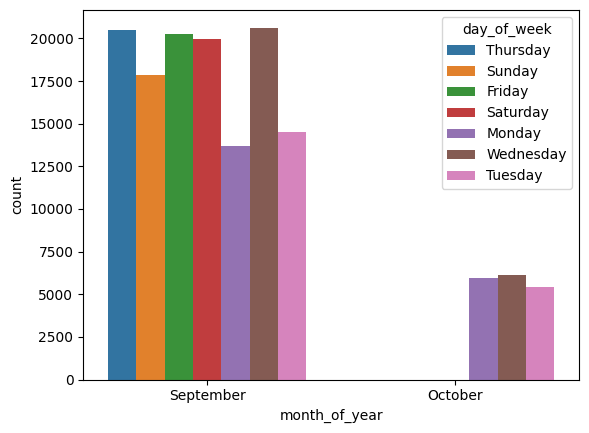

In [ ]:
sns.countplot(x=df['month_of_year'],hue=df['day_of_week'])

Majority of trip creation occurred in 9 th month,3 day trip creation in October [M, W,TU]

**Trip Creation Hour**

<Axes: xlabel='hour_of_ day', ylabel='count'>

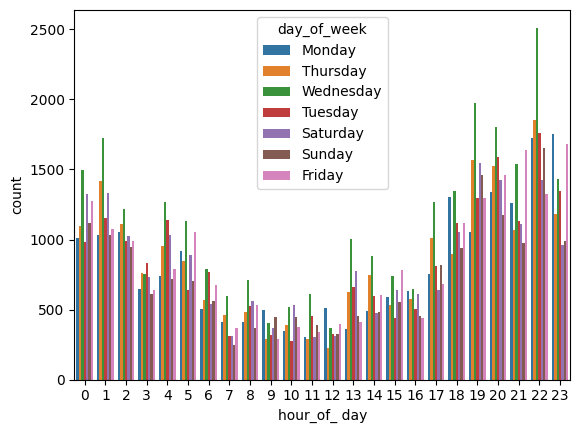

In [ ]:
sns.countplot(hue=df['day_of_week'],x=df['hour_of_ day'])

Majority of trip creation occurred in Wendesday & Thursuday from  [19:00-1:00Am]

**Actual time & OSM Time**

In [ ]:
x1=df.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1

source_state     variable       value
0      Andhra Pradesh  actual_time  142.610760
1   Arunachal Pradesh  actual_time  139.085714
2               Assam  actual_time  781.775652
3               Bihar  actual_time  372.885203
4          Chandigarh  actual_time   49.189349
..                ...          ...         ...
57          Telangana    osrm_time  124.035099
58            Tripura    osrm_time   72.000000
59      Uttar Pradesh    osrm_time   70.908645
60        Uttarakhand    osrm_time   89.470740
61        West Bengal    osrm_time  160.000168

[62 rows x 3 columns]

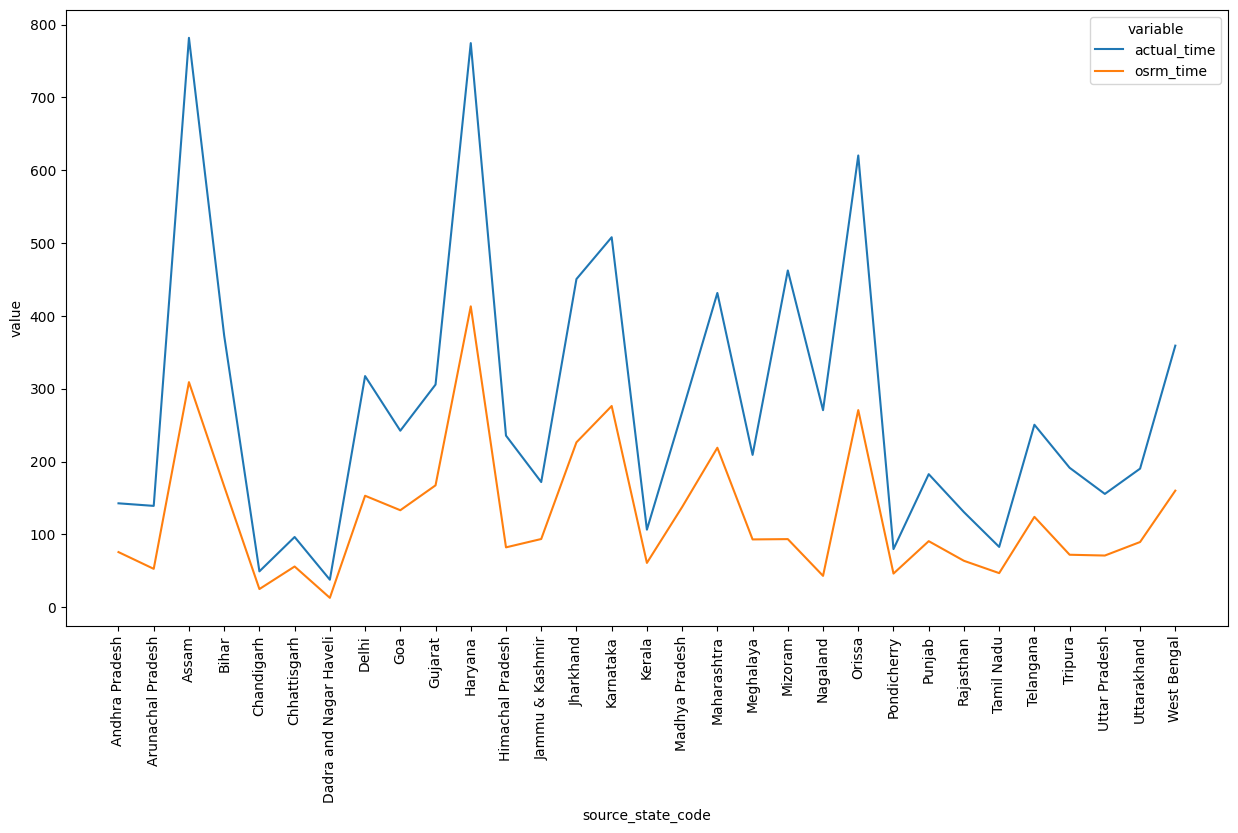

In [ ]:
plt.figure(figsize=(15,8))
# Convert 'source_state' to categorical and assign numerical order
x1['source_state'] = pd.Categorical(x1['source_state'])
x1['source_state_code'] = x1['source_state'].cat.codes

sns.lineplot(data=x1, x='source_state_code', y='value', hue='variable')
plt.xticks(ticks=x1['source_state_code'].unique(), labels=x1['source_state'].unique(), rotation=90)

plt.show()


- In Assam we can see there is high variation in actual and osrm time

In [ ]:
import plotly.express as px
# Group by 'hour_of__day' and count the number of 'trip_uuid'
trip_counts = df.groupby('hour_of_ day')['trip_uuid'].count().reset_index()

# Now create the line plot using the aggregated data
fig = px.line(trip_counts, x='hour_of_ day', y='trip_uuid', markers=True)

fig.update_xaxes(tickvals=list(trip_counts['hour_of_ day'].unique()))

fig.update_layout(
    title='Trips created on hour to hour ',
    xaxis_title='Hour',
    yaxis_title='Number of trips Created'
)

fig.show()

A rising trend in the number of trips created is observed from 12 pm to 10 pm, with the highest number recorded at 10 pm.

**Top  Indian states with most product delivery sources**

Text(0.5, 1.0, 'Top Indian states with most product delivery sources')

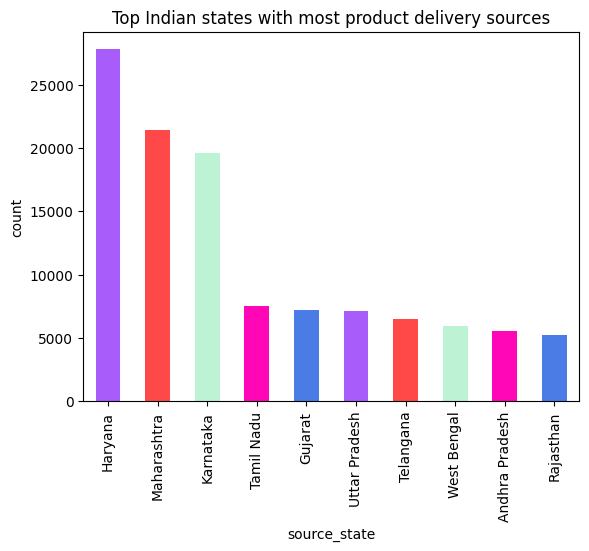

In [ ]:
color_sequences = ['#A85CF9','#FF4949','#BDF2D5','#FF06B7','#4B7BE5']
df.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=color_sequences )
plt.xlabel('source_state')
plt.ylabel('count')
plt.title('Top Indian states with most product delivery sources')

Top 3 Indian states with most product delivery sources are:
- Haryana
- Maharashtra
- Karnataka



**Top  Indian  destination with most product delivery sources**

Text(0.5, 1.0, 'Top Indian states with most product delivery sources')

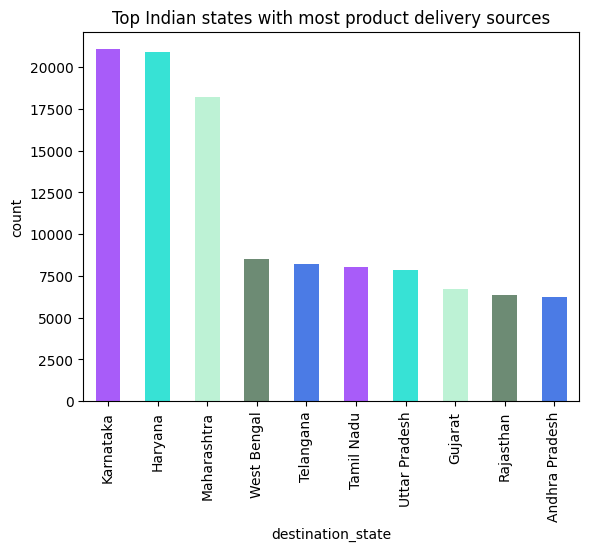

In [ ]:
color_sequences = ['#A85CF9','#37E2D5','#BDF2D5','#6D8B74','#4B7BE5']
df.groupby('destination_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=color_sequences )
plt.xlabel('destination_state')
plt.ylabel('count')
plt.title('Top Indian states with most product delivery sources')

Top 3 Indian states with the most product delivery destinations are :

- Karnataka
- Haryana
- Maharashtra



**Destination places in each state**

Text(0, 0.5, 'count')

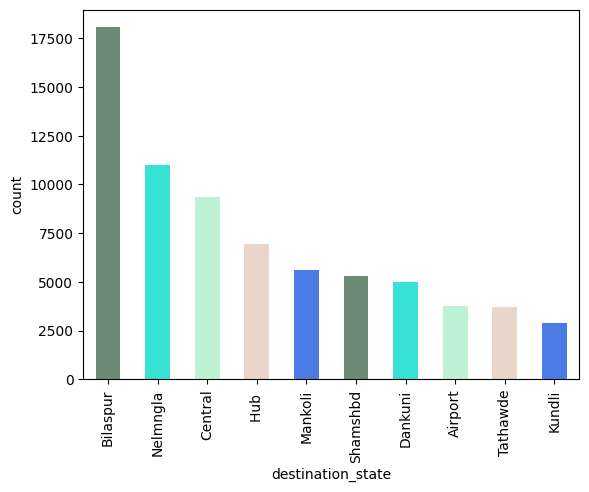

In [ ]:
color_sequences = ['#6D8B74','#37E2D5','#BDF2D5','#E9D5CA','#4B7BE5']
df.groupby('destination_place')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=color_sequences )
plt.xlabel('destination_state')
plt.ylabel('count')


Bilaspur in Haryana is the most delivered location in the entire state.

**Which city have more delivery ?**

Text(0.5, 1.0, 'Source places in each state')

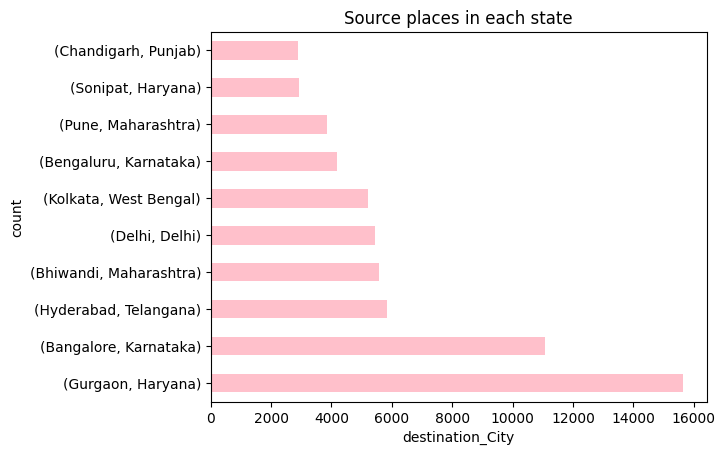

In [ ]:
color_sequences = ['pink']
df.groupby(['destination_City','destination_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='barh',color=color_sequences )
plt.xlabel('destination_City')
plt.ylabel('count')
plt.title('Source places in each state')


The cities with most destination centres are :
- Gurgaon
- Bangalore
- Hyderabad



Skewness of numeric features:
segment_factor                    47.372766
segment_osrm_distance             26.585363
segment_osrm_time                 19.639634
factor                            17.490811
segment_actual_time               16.827413
actual_time                        2.068065
osrm_distance                      2.048236
osrm_time                          2.045166
cutoff_factor                      1.992094
actual_distance_to_destination     1.991105
start_scan_to_end_scan             1.110624
dtype: float64


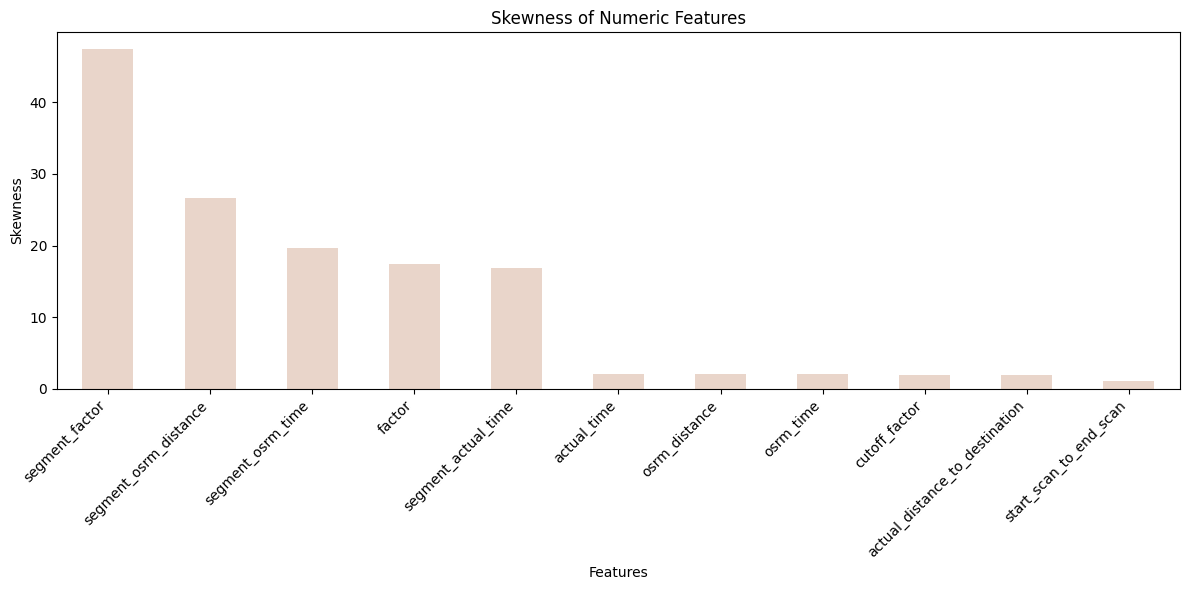

In [ ]:
# Calculate skewness for numeric columns
skewness = num.skew().sort_values(ascending=False)

print("Skewness of numeric features:")
print(skewness)

# Visualize skewness
plt.figure(figsize=(12, 6))
color_sequences=['#E9D5CA']
skewness.plot(kind='bar',color=color_sequences)
plt.title('Skewness of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Building ML Models

In [ ]:
# Calculate discrepancies
df['time_discrepancy'] = df['actual_time'] - df['osrm_time']
df['distance_discrepancy'] = df['actual_distance_to_destination'] - df['osrm_distance']

In [ ]:
for col in df.select_dtypes(include=['datetime64']).columns:
    df[col] = pd.to_numeric(df[col])

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LE.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge ,Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression analysis
X = df.drop(columns=['distance_discrepancy','time_discrepancy'])
y_time = df['time_discrepancy']
y_distance = df['distance_discrepancy']

# Split the data into training and testing sets
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X, y_time, test_size=0.2, random_state=42)
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X, y_distance, test_size=0.2, random_state=42)

- **Applying Linear Regression**

In [ ]:
# Train the linear regression model for time discrepancy
model_time = LinearRegression()
model_time.fit(X_train_time, y_train_time)

# Predict and evaluate the model for time discrepancy
y_pred_time = model_time.predict(X_test_time)
mse_time = mean_squared_error(y_test_time, y_pred_time)
r2_time = r2_score(y_test_time, y_pred_time)

# Train the linear regression model for distance discrepancy
model_distance = LinearRegression()
model_distance.fit(X_train_distance, y_train_distance)

# Predict and evaluate the model for distance discrepancy
y_pred_distance = model_distance.predict(X_test_distance)
mse_distance = mean_squared_error(y_test_distance, y_pred_distance)
r2_distance = r2_score(y_test_distance, y_pred_distance)

# Display the evaluation results
print('Time Discrepancy Model:')
print('Mean Squared Error:', mse_time)
print('R-squared:', r2_time)

print('Distance Discrepancy Model:')
print('Mean Squared Error:', mse_distance)
print('R-squared:', r2_distance)

Time Discrepancy Model:
Mean Squared Error: 10.861966791975082
R-squared: 0.9998834375518034
Distance Discrepancy Model:
Mean Squared Error: 15.756183362710424
R-squared: 0.9976191189094059


- **Applying Ridge Regression**

In [ ]:
# Train the linear regression model for time discrepancy
model_time = Ridge(alpha=0.1)
model_time.fit(X_train_time, y_train_time)

# Predict and evaluate the model for time discrepancy
y_pred_time = model_time.predict(X_test_time)
mse_time = mean_squared_error(y_test_time, y_pred_time)
r2_time = r2_score(y_test_time, y_pred_time)

# Train the linear regression model for distance discrepancy
model_distance = Ridge(alpha=0.1)
model_distance.fit(X_train_distance, y_train_distance)

# Predict and evaluate the model for distance discrepancy
y_pred_distance = model_distance.predict(X_test_distance)
mse_distance = mean_squared_error(y_test_distance, y_pred_distance)
r2_distance = r2_score(y_test_distance, y_pred_distance)

# Display the evaluation results
print('Time Discrepancy Model:')
print('Mean Squared Error:', mse_time)
print('R-squared:', r2_time)

print('Distance Discrepancy Model:')
print('Mean Squared Error:', mse_distance)
print('R-squared:', r2_distance)


Time Discrepancy Model:
Mean Squared Error: 1.4088130143151713e-13
R-squared: 1.0
Distance Discrepancy Model:
Mean Squared Error: 3.718508712124499e-14
R-squared: 1.0


In [ ]:

# Print model coefficients and intercept
print(f"Coefficients: {model_time.coef_}")
print(f"Intercept: {model_time.intercept_}")
print('*******************************************************')
 # Print model coefficients and intercept
print(f"Coefficients: {model_distance.coef_}")
print(f"Intercept: {model_distance.intercept_}")


Coefficients: [ 9.42090186e-08 -5.20235715e-22  1.76385925e-11 -1.93303363e-07
 -1.58784254e-06  3.75818097e-11 -4.36121464e-10 -2.74598113e-11
  2.38432516e-06 -8.62550298e-19  8.62443176e-19  1.44584218e-08
  3.33308868e-01  6.66690856e-01 -9.99999985e-01 -9.17109253e-09
 -3.25950742e-10 -7.16933159e-10 -2.35497128e-09 -3.97393170e-06
  4.82941064e-07 -3.33308865e-01  1.58803839e-06 -6.43224884e-11
  2.79378223e-07  2.75761083e-09 -3.67305161e-09  6.36064278e-10
  3.47816574e-09 -5.01746108e-08 -2.38411117e-06  1.91595165e-09
 -2.56416881e-10 -6.80444682e-11  4.76394991e-10 -4.37411453e-10
 -2.00881791e-09  1.05591003e-09  4.45535927e-11  4.33024255e-10]
Intercept: 0.0009635021619374129
*******************************************************
Coefficients: [ 4.28112708e-08 -3.75010278e-22  2.85184258e-12 -4.92907370e-08
 -1.98080972e-07  1.04137602e-11  2.41250115e-10 -1.78182486e-11
 -8.94575621e-07 -2.93513608e-19  2.93773926e-19 -4.36856362e-09
  6.66786375e-01  3.33213494e-01 -5.8

- **Applying Lasso Regression**

In [ ]:
# Train the linear regression model for time discrepancy
ls_model_time =Lasso(alpha=0.1)
ls_model_time.fit(X_train_time, y_train_time)

# Predict and evaluate the model for time discrepancy
y_pred_time = model_time.predict(X_test_time)
mse_time = mean_squared_error(y_test_time, y_pred_time)
r2_time = r2_score(y_test_time, y_pred_time)

# Train the linear regression model for distance discrepancy
ls_model_distance = Lasso(alpha=0.1)
ls_model_distance.fit(X_train_distance, y_train_distance)

# Predict and evaluate the model for distance discrepancy
y_pred_distance = model_distance.predict(X_test_distance)
mse_distance = mean_squared_error(y_test_distance, y_pred_distance)
r2_distance = r2_score(y_test_distance, y_pred_distance)

# Display the evaluation results
print('Time Discrepancy Model:')
print('Mean Squared Error:', mse_time)
print('R-squared:', r2_time)

print('Distance Discrepancy Model:')
print('Mean Squared Error:', mse_distance)
print('R-squared:', r2_distance)


Time Discrepancy Model:
Mean Squared Error: 1.4088130143151713e-13
R-squared: 1.0
Distance Discrepancy Model:
Mean Squared Error: 3.718508712124499e-14
R-squared: 1.0


In [ ]:

# Print model coefficients and intercept
print(f"Coefficients: {model_time.coef_}")
print(f"Intercept: {model_time.intercept_}")
print('*******************************************************')
 # Print model coefficients and intercept
print(f"Coefficients: {model_distance.coef_}")
print(f"Intercept: {model_distance.intercept_}")


Coefficients: [ 9.42090186e-08 -5.20235715e-22  1.76385925e-11 -1.93303363e-07
 -1.58784254e-06  3.75818097e-11 -4.36121464e-10 -2.74598113e-11
  2.38432516e-06 -8.62550298e-19  8.62443176e-19  1.44584218e-08
  3.33308868e-01  6.66690856e-01 -9.99999985e-01 -9.17109253e-09
 -3.25950742e-10 -7.16933159e-10 -2.35497128e-09 -3.97393170e-06
  4.82941064e-07 -3.33308865e-01  1.58803839e-06 -6.43224884e-11
  2.79378223e-07  2.75761083e-09 -3.67305161e-09  6.36064278e-10
  3.47816574e-09 -5.01746108e-08 -2.38411117e-06  1.91595165e-09
 -2.56416881e-10 -6.80444682e-11  4.76394991e-10 -4.37411453e-10
 -2.00881791e-09  1.05591003e-09  4.45535927e-11  4.33024255e-10]
Intercept: 0.0009635021619374129
*******************************************************
Coefficients: [ 4.28112708e-08 -3.75010278e-22  2.85184258e-12 -4.92907370e-08
 -1.98080972e-07  1.04137602e-11  2.41250115e-10 -1.78182486e-11
 -8.94575621e-07 -2.93513608e-19  2.93773926e-19 -4.36856362e-09
  6.66786375e-01  3.33213494e-01 -5.8

# summarize our analysis



Data Cleaning and Preparation:

    Filled missing values in source_name and destination_name using simple imputer.
    Converted timestamp columns to datetime format.
    Converted route and data to catg format

Exploratory Data Analysis (EDA):

    Visualized the distribution of trip durations and distances.
    Analyzed the relationship between trip duration and distance.
    Compared actual times and distances with OSRM estimated times and distances.

Feature Engineering:

    Transform features to improve their representation for modeling.
    Scale features to bring them into a comparable range for model training.
    Create New Features
    use recursive feature elimination techniques to remove the least important features iteratively.


# Key Findings

- Strong positive correlations observed between actual time, OSRM time.
- For delivering the products prioritize carting shipments rout type because FTL shipments Full Truck Load takes more time tto deliver product and time taken to actual than that of rout type
- Most of the products were delivered on Wednesday followed by Thursday. The least number of products were delivered on Sunday. This indicates that customers should get products delivered during weekdays other than Sundays or Mondays.
- A rising trend in the number of trips created is observed from 12 pm to 10 pm, with the highest number recorded at 10 pm.
- There is a significant positive correlation between the distance to the destination and the actual delivery time. Longer distances will lead to longer delivery times due to increased travel time and potential delays.
-Similarly, the observed value for actual distance is always higher than the same distance for product delivery. An open-source routing engine that computes the shortest path between points can explain the traffic conditions.